Your mission is to delve into a dataset of house sale prices for King County, including Seattle, spanning one year from May 2014 to May 2015. This project encompasses various computational tasks such as data loading, visualization, calculating returns, and portfolio analysis, tailored to the real estate domain. It aims to enhance your Python skills, deepen your understanding of real estate financial data, and hone your analytical prowess. Are you ready to embark on this analytical journey through the housing market?


TARGET --> Price: Our primary focus is to understand which features most significantly impact the house price. Additionally, we aim to explore properties valued at $650K and above for more detailed insights.

In [1]:
#library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler 

<h1 style="color: #4d1b7b;">Data Extraction </h1>

<h3 style="color: #c79dd7;">Extracting & Exploring the Data </h3>

In [2]:
data = pd.read_csv('king_ country_ houses_aa.csv')

In [3]:
pd.set_option('display.max_columns', None)
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [4]:
data.shape

(21613, 21)

In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
data.nunique().sort_values(ascending=False)

id               21436
sqft_lot          9782
sqft_lot15        8689
lat               5034
price             4028
sqft_living       1038
sqft_above         946
sqft_living15      777
long               752
date               372
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
bathrooms           30
bedrooms            13
grade               12
floors               6
view                 5
condition            5
waterfront           2
dtype: int64

<h3 style="color: #c79dd7;">Copy as best practices</h3>

In [8]:
df = data.copy()

<h1 style="color: #4d1b7b;">Data Cleaning </h1>

<h3 style="color: #c79dd7;">Changing the index</h3>

In [9]:
df.set_index('id', inplace=True)

<h3 style="color: #c79dd7;">Dealing with Duplicates, NaN</h3>

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().any().sum()

0

In [12]:
df.date.dtype

dtype('O')

In [13]:
df.eq(" ").sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h3 style="color: #c79dd7;">Formating Date column</h3>

In [14]:
df['date']=df['date'].apply(lambda x: x.split('T')[0]).astype(int)

In [15]:
df.date.dtypes

dtype('int64')

In [16]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [17]:
from datetime import datetime

In [18]:
df.date.dtypes

dtype('<M8[ns]')

In [19]:
df['date']= df['date'].apply(lambda x: x.toordinal())

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 1

In [21]:
pd.set_option('display.max_rows', None)
data.yr_built.value_counts()

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    320
1962    312
1954    305
2001    305
1987    294
1989    290
1969    280
1955    271
1988    270
1999    265
1947    263
1963    256
1976    253
1950    250
1966    250
1994    249
1960    248
1980    240
1998    239
1948    235
2009    230
1951    229
1984    229
1985    228
1991    224
1961    224
1958    224
1942    223
1953    223
2002    222
1952    220
2000    218
1986    215
1983    212
1993    202
2013    201
1981    199
1957    198
1956    198
1992    198
1996    195
1949    195
1975    189
1965    187
1926    180
1997    177
1964    172
2012    170
1943    170
1995    169
1925    165
1974    162
1941    161
1940    156
1973    149
1972    149
2010    143
1944    140
1924    139
1910    134
1970    132
2011    130
1928    126
1946    126
1918    120
1927    115
1929    114
1939    106
1982    105
1971   

<h3 style="color: #c79dd7;">Dropping unnecessary columns</h3>

In [22]:
df = df.drop(columns=['lat','long'])

<h3 style="color: #c79dd7;">Moving Target to the right</h3>

TARGET --> Price: Our primary focus is to understand which features most significantly impact the house price. Additionally, we aim to explore properties valued at $650K and above for more detailed insights.


In [23]:
target = df.pop('price')

In [24]:
df['price'] = target

In [25]:
df.head(3)

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                       
7129300520  735519         3       1.00         1180      5650     1.0   
6414100192  735576         3       2.25         2570      7242     2.0   
5631500400  735654         2       1.00          770     10000     1.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   

            yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  \
id                                                                       
7129300520      1955             0    98178           1340        5650   
6414100192      1951          1991    98125           1690        7639   
5631500400      1933             0    98028           2720        8062   

               price  
id                    
7129300520  221900.0  
6414100192  538000.0  
5631500400  180000.0

In [26]:
#df.price.value_counts.sort_values(ascending=False)
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [27]:
# high_value_properties
#df = df[df['price'] >= 650000]

In [28]:
#df.shape

In [29]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<h1 style="color: #4d1b7b;">EDA</h1>

<h3 style="color: #c79dd7;">Checking Unique Values</h3>

- id: A unique identifier for a house.
- date: The date on which the house was sold.
- price: The sale price of the house (prediction target).
- bedrooms: Number of bedrooms in the house.
- bathrooms: Number of bathrooms in the house, per bedroom.
- sqft_living: Square footage of the interior living space.
- sqft_lot: Square footage of the land space.
- floors: Number of floors (levels) in the house.
- waterfront: Whether the house has a waterfront view.
- view: Number of times the house has been viewed.
- condition: The overall condition of the house.
- grade: The overall grade given to the house, based on the King County grading system.
- sqft_above: Square footage of the house apart from the basement.
- sqft_basement: Square footage of the basement.
- yr_built: The year the house was built.
- yr_renovated: The year the house was renovated.
- zipcode: ZIP code area.
- lat: Latitude coordinate.
- long: Longitude coordinate.
- sqft_living15: The interior living space for the nearest 15 neighbors in 2015.
- sqft_lot15: The land spaces for the nearest 15 neighbors in 2015.

In [30]:
df.nunique().sort_values(ascending=False)

sqft_lot         9782
sqft_lot15       8689
price            4028
sqft_living      1038
sqft_above        946
sqft_living15     777
date              372
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
bathrooms          30
bedrooms           13
grade              12
floors              6
view                5
condition           5
waterfront          2
dtype: int64

<h3 style="color: #c79dd7;">Descriptive Statistics </h3>

In [31]:
df.describe().T

count           mean            std       min        25%  \
date           21613.0  735535.193078     113.048011  735355.0  735436.00   
bedrooms       21613.0       3.370842       0.930062       0.0       3.00   
bathrooms      21613.0       2.114757       0.770163       0.0       1.75   
sqft_living    21613.0    2079.899736     918.440897     290.0    1427.00   
sqft_lot       21613.0   15106.967566   41420.511515     520.0    5040.00   
floors         21613.0       1.494309       0.539989       1.0       1.00   
waterfront     21613.0       0.007542       0.086517       0.0       0.00   
view           21613.0       0.234303       0.766318       0.0       0.00   
condition      21613.0       3.409430       0.650743       1.0       3.00   
grade          21613.0       7.656873       1.175459       1.0       7.00   
sqft_above     21613.0    1788.390691     828.090978     290.0    1190.00   
sqft_basement  21613.0     291.509045     442.575043       0.0       0.00   
yr_built       21613.0    1971.005136      29.373411    1900.0    1951.00   
yr_renovated   21613.0      84.402258     401.679240       0.0       0.00   
zipcode        21613.0   98077.939805      53.505026   98001.0   98033.00   
sqft_living15  21613.0    1986.552492     685.391304     399.0    1490.00   
sqft_lot15     21613.0   12768.455652   27304.179631     651.0    5100.00   
price          21613.0  540088.141767  367127.196483   75000.0  321950.00   

                     50%       75%        max  
date           735522.00  735646.0   735745.0  
bedrooms            3.00       4.0       33.0  
bathrooms           2.25       2.5        8.0  
sqft_living      1910.00    2550.0    13540.0  
sqft_lot         7618.00   10688.0  1651359.0  
floors              1.50       2.0        3.5  
waterfront          0.00       0.0        1.0  
view                0.00       0.0        4.0  
condition           3.00       4.0        5.0  
grade               7.00       8.0       13.0  
sqft_above       1560.00    2210.0     9410.0  
sqft_basement       0.00     560.0     4820.0  
yr_built         1975.00    1997.0     2015.0  
yr_renovated        0.00       0.0     2015.0  
zipcode         98065.00   98118.0    98199.0  
sqft_living15    1840.00    2360.0     6210.0  
sqft_lot15       7620.00   10083.0   871200.0  
price          450000.00  645000.0  7700000.0

In [32]:
#df.price.value_counts()[0] / len(df) * 100

<h3 style="color: #c79dd7;">Checking Distribution</h3>

In [33]:
df.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price'],
      dtype='object')

In [34]:
df_dist_sqft = df[['sqft_living','sqft_above','sqft_lot','sqft_basement','sqft_living15','sqft_lot15']]

In [35]:
df_cat = df[['bedrooms', 'bathrooms','floors','waterfront', 'condition', 'grade',]]

In [36]:
#'yr_built', 'yr_renovated','date'

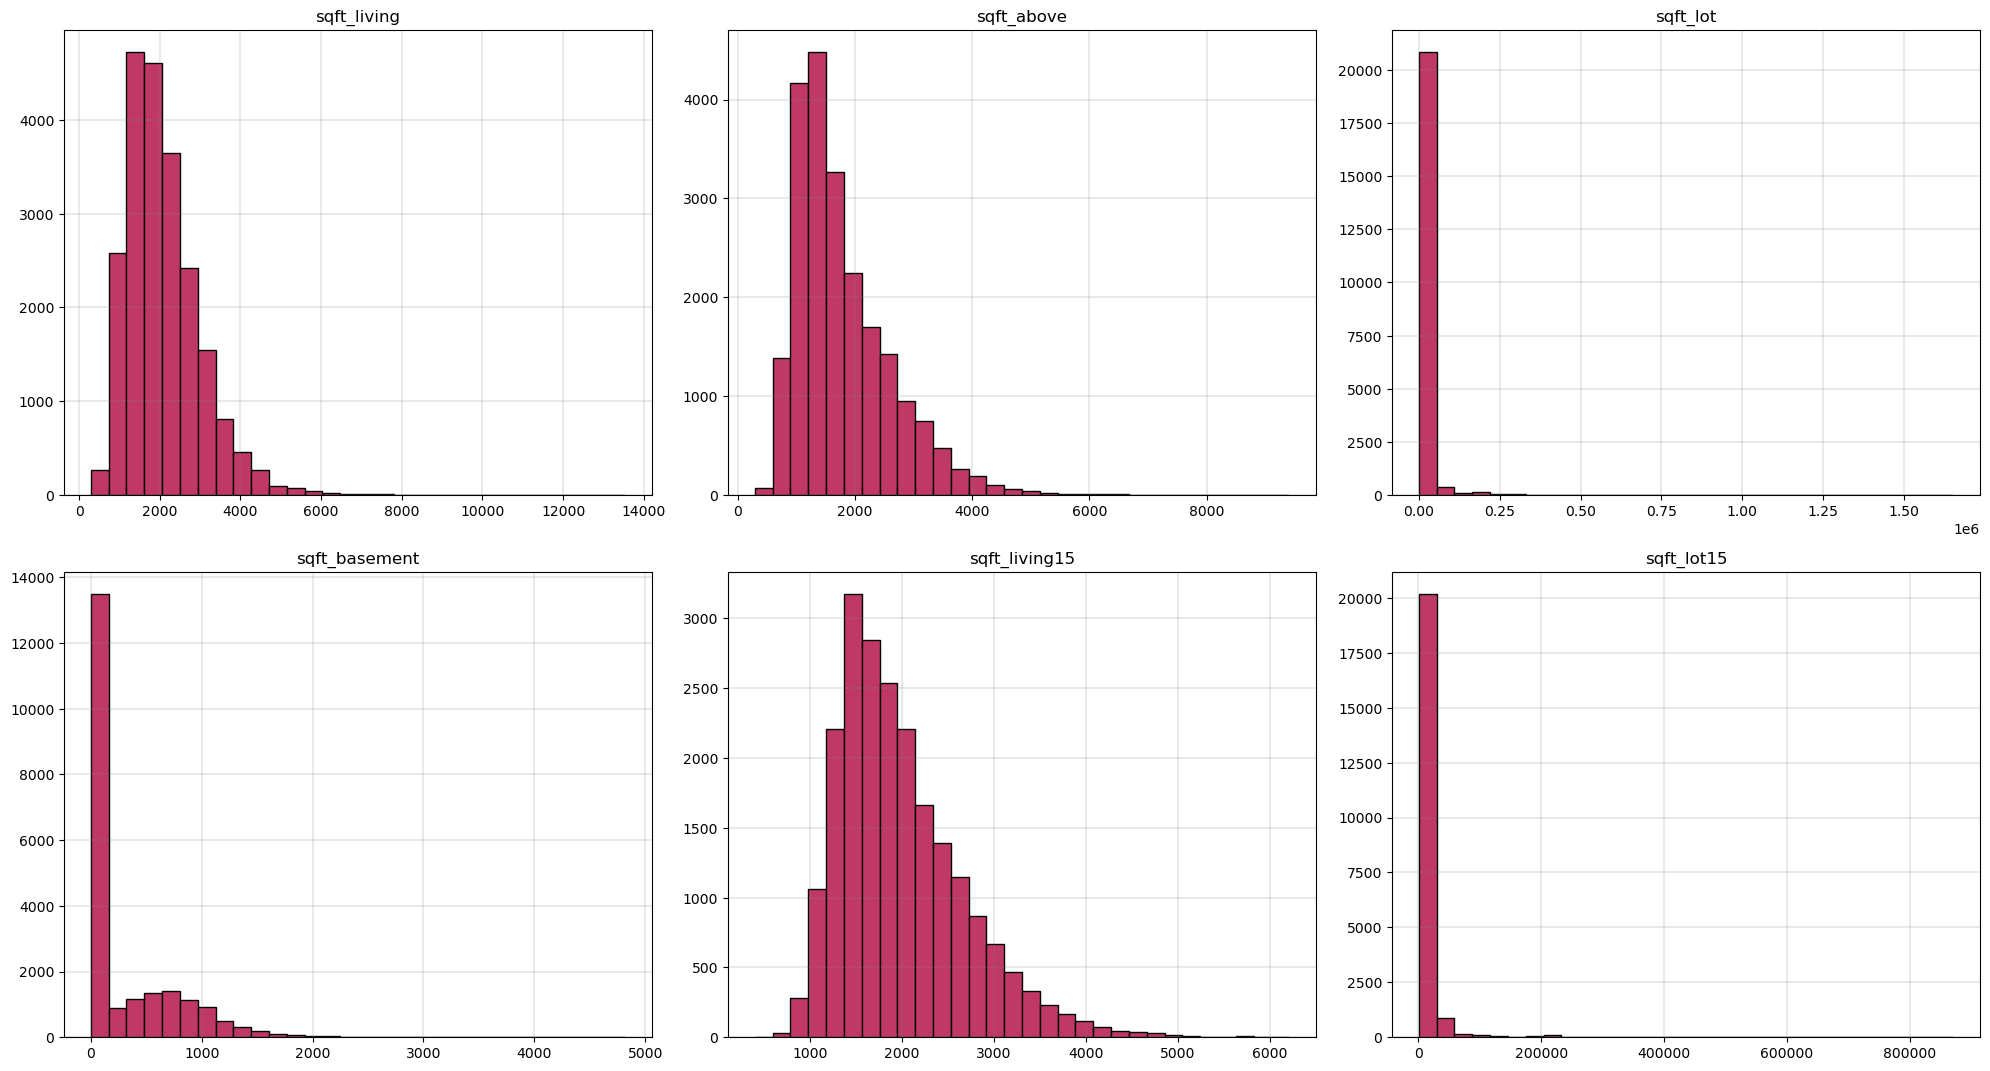

In [37]:
color = '#c03865'

# grid size
nrows, ncols = 3, 3  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df_dist_sqft.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df_dist_sqft.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df_dist_sqft.columns[i])
    ax.grid(True, color='grey',linewidth=0.25)

plt.tight_layout()
plt.show()

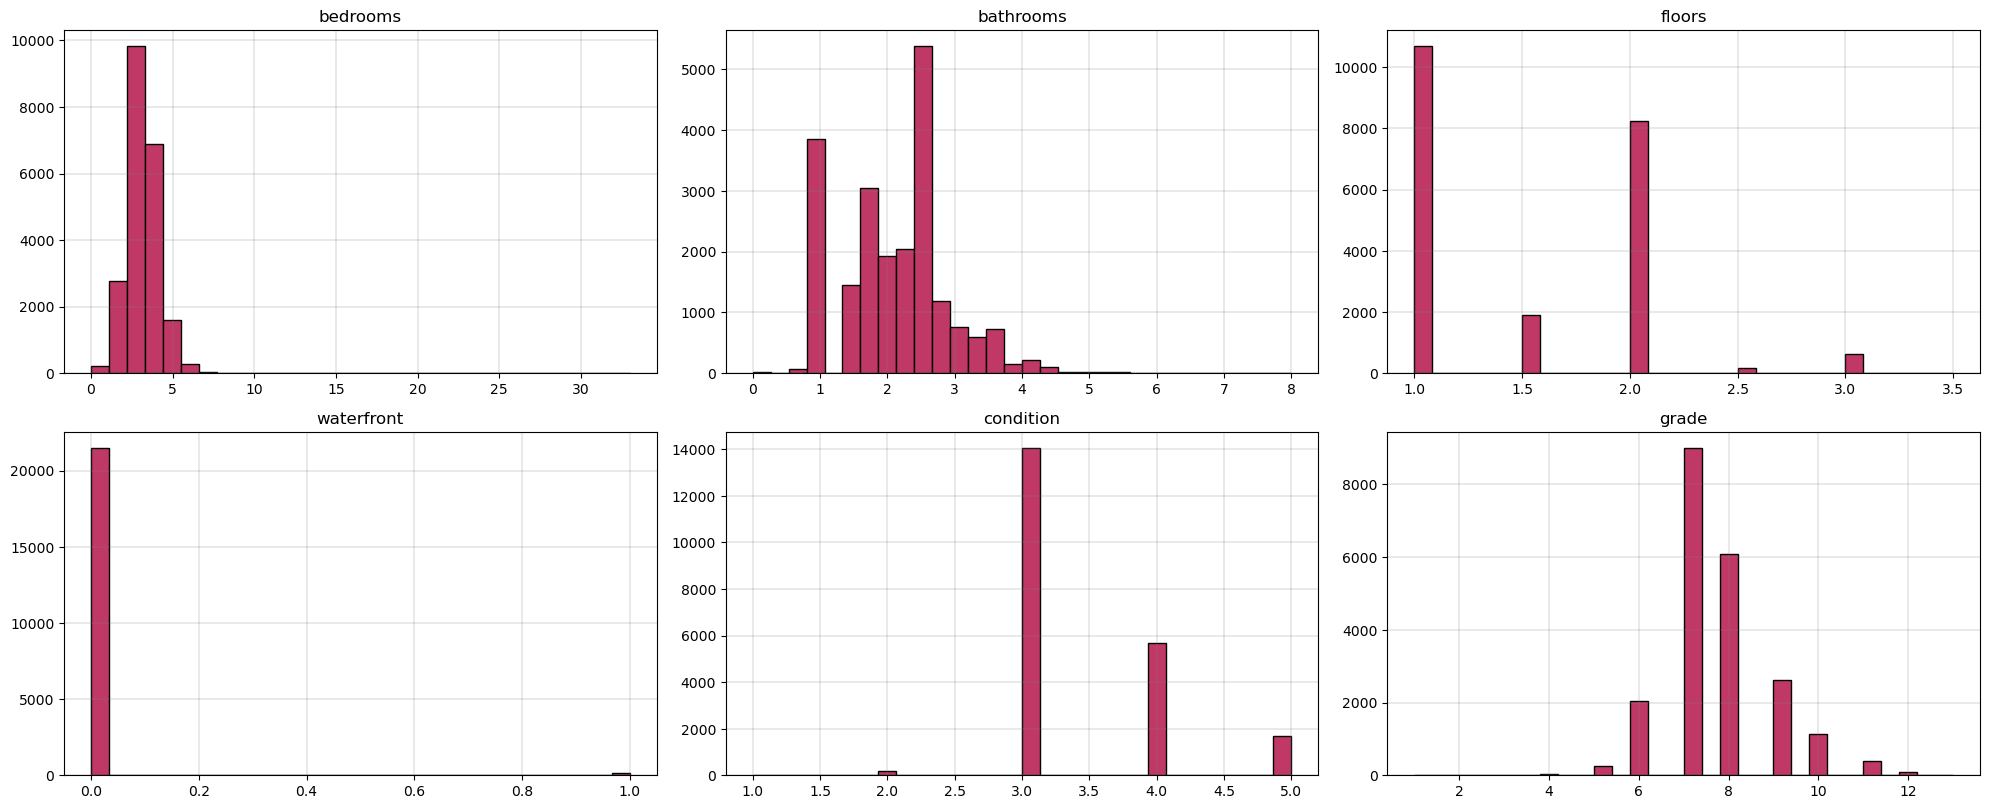

In [38]:
color = '#c03865'

# grid size
nrows, ncols = 4, 3  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df_cat.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df_cat.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df_cat.columns[i])
    ax.grid(True, color='grey',linewidth=0.25)

plt.tight_layout()
plt.show()

In [39]:
df.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                       
7129300520  735519         3       1.00         1180      5650     1.0   
6414100192  735576         3       2.25         2570      7242     2.0   
5631500400  735654         2       1.00          770     10000     1.0   
2487200875  735576         4       3.00         1960      5000     1.0   
1954400510  735647         3       2.00         1680      8080     1.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
7129300520           0     0          3      7        1180              0   
6414100192           0     0          3      7        2170            400   
5631500400           0     0          3      6         770              0   
2487200875           0     0          5      7        1050            910   
1954400510           0     0          3      8        1680              0   

            yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  \
id                                                                       
7129300520      1955             0    98178           1340        5650   
6414100192      1951          1991    98125           1690        7639   
5631500400      1933             0    98028           2720        8062   
2487200875      1965             0    98136           1360        5000   
1954400510      1987             0    98074           1800        7503   

               price  
id                    
7129300520  221900.0  
6414100192  538000.0  
5631500400  180000.0  
2487200875  604000.0  
1954400510  510000.0

<h3 style="color: #c79dd7;">Checking Target Distribution</h3>

In [40]:
#df=df.drop(columns='date')

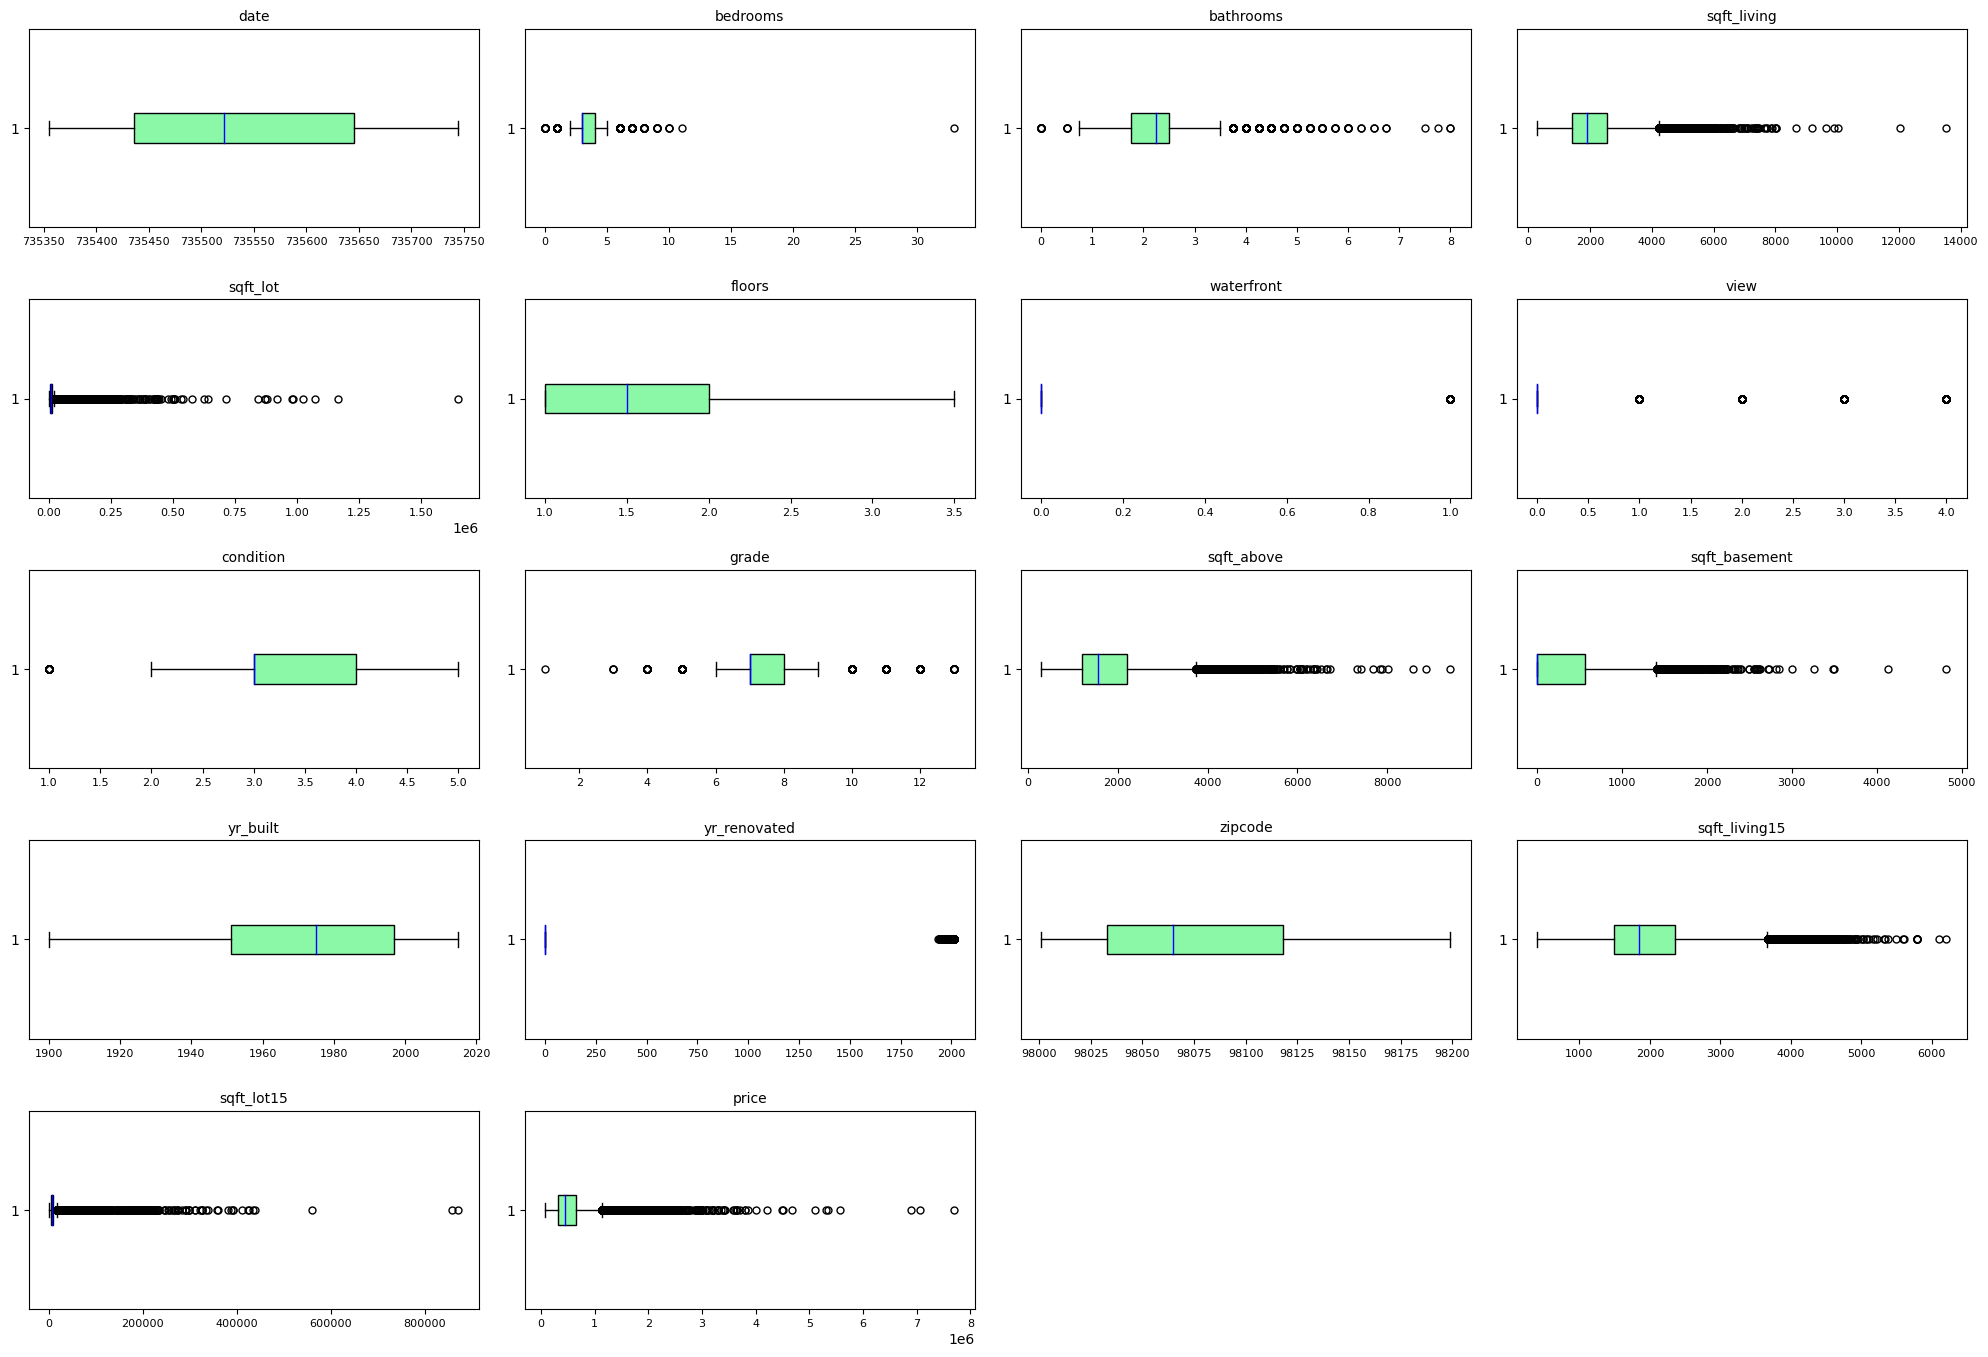

In [41]:
color = '#8bf8a7'

# grid size
nrows, ncols = 6, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='blue'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [ ]:
df_dist_sqft

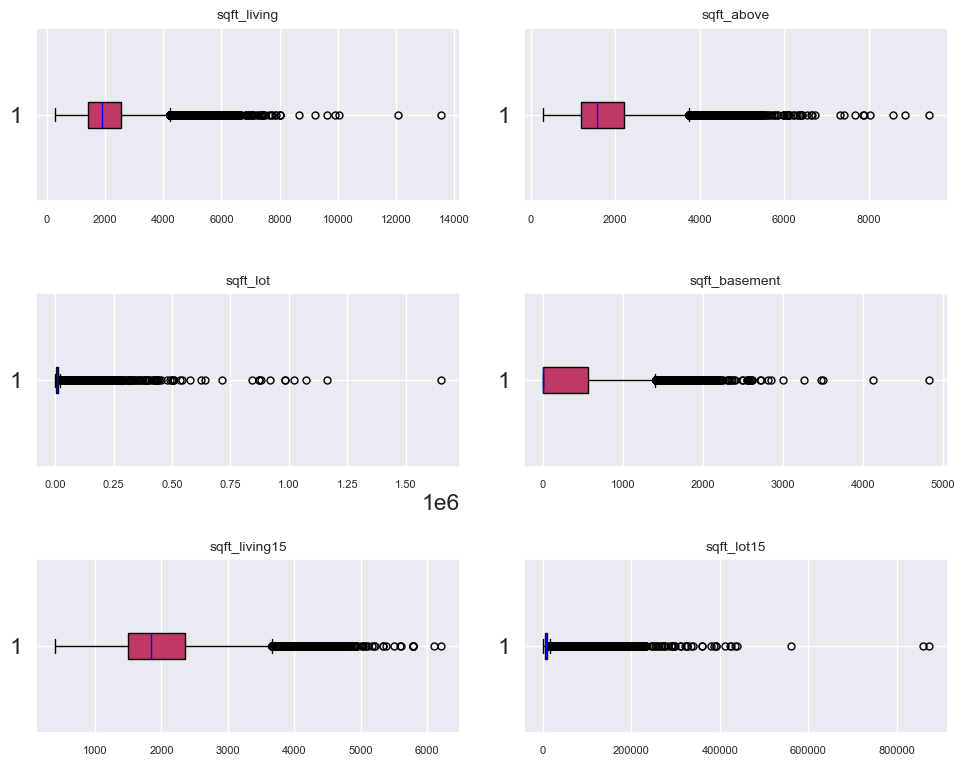

In [128]:
color = '#c03865'

# grid size
nrows, ncols = 3, 2 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df_dist_sqft.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df_dist_sqft.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='blue'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df_dist_sqft.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

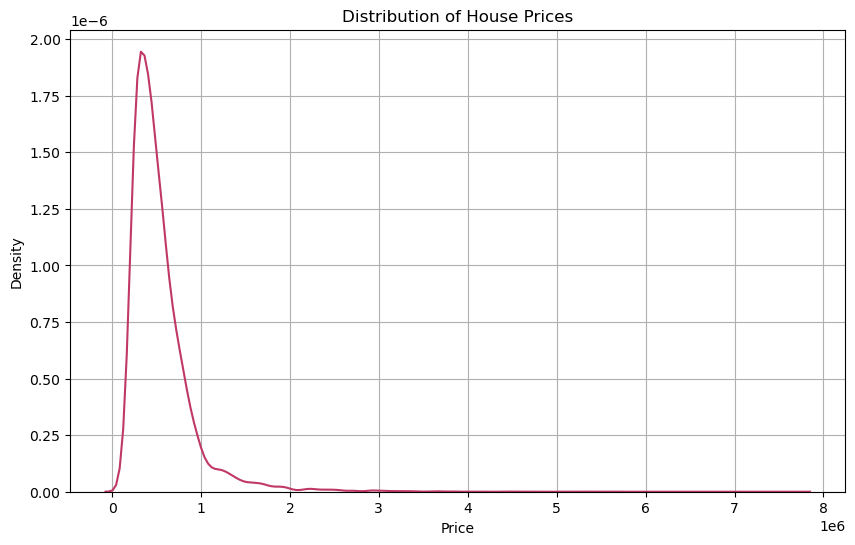

In [42]:
# checking our target distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], color='#c03865')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.grid(True)
plt.show()

<h3 style="color: #c79dd7;">Checking Outliers</h3>

<h3 style="color: #c79dd7;">Looking for Correlations</h3>

In [43]:
num_corr = df.corr().round(2)
num_corr

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date           1.00     -0.02      -0.03        -0.03      0.01   -0.02   
bedrooms      -0.02      1.00       0.52         0.58      0.03    0.18   
bathrooms     -0.03      0.52       1.00         0.75      0.09    0.50   
sqft_living   -0.03      0.58       0.75         1.00      0.17    0.35   
sqft_lot       0.01      0.03       0.09         0.17      1.00   -0.01   
floors        -0.02      0.18       0.50         0.35     -0.01    1.00   
waterfront     0.00     -0.01       0.06         0.10      0.02    0.02   
view          -0.00      0.08       0.19         0.28      0.07    0.03   
condition     -0.05      0.03      -0.12        -0.06     -0.01   -0.26   
grade         -0.04      0.36       0.66         0.76      0.11    0.46   
sqft_above    -0.03      0.48       0.69         0.88      0.18    0.52   
sqft_basement -0.02      0.30       0.28         0.44      0.02   -0.25   
yr_built      -0.00      0.15       0.51         0.32      0.05    0.49   
yr_renovated  -0.02      0.02       0.05         0.06      0.01    0.01   
zipcode        0.00     -0.15      -0.20        -0.20     -0.13   -0.06   
sqft_living15 -0.03      0.39       0.57         0.76      0.14    0.28   
sqft_lot15     0.00      0.03       0.09         0.18      0.72   -0.01   
price         -0.00      0.31       0.53         0.70      0.09    0.26   

               waterfront  view  condition  grade  sqft_above  sqft_basement  \
date                 0.00 -0.00      -0.05  -0.04       -0.03          -0.02   
bedrooms            -0.01  0.08       0.03   0.36        0.48           0.30   
bathrooms            0.06  0.19      -0.12   0.66        0.69           0.28   
sqft_living          0.10  0.28      -0.06   0.76        0.88           0.44   
sqft_lot             0.02  0.07      -0.01   0.11        0.18           0.02   
floors               0.02  0.03      -0.26   0.46        0.52          -0.25   
waterfront           1.00  0.40       0.02   0.08        0.07           0.08   
view                 0.40  1.00       0.05   0.25        0.17           0.28   
condition            0.02  0.05       1.00  -0.14       -0.16           0.17   
grade                0.08  0.25      -0.14   1.00        0.76           0.17   
sqft_above           0.07  0.17      -0.16   0.76        1.00          -0.05   
sqft_basement        0.08  0.28       0.17   0.17       -0.05           1.00   
yr_built            -0.03 -0.05      -0.36   0.45        0.42          -0.13   
yr_renovated         0.09  0.10      -0.06   0.01        0.02           0.07   
zipcode              0.03  0.08       0.00  -0.18       -0.26           0.07   
sqft_living15        0.09  0.28      -0.09   0.71        0.73           0.20   
sqft_lot15           0.03  0.07      -0.00   0.12        0.19           0.02   
price                0.27  0.40       0.04   0.67        0.61           0.32   

               yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  \
date              -0.00         -0.02     0.00          -0.03        0.00   
bedrooms           0.15          0.02    -0.15           0.39        0.03   
bathrooms          0.51          0.05    -0.20           0.57        0.09   
sqft_living        0.32          0.06    -0.20           0.76        0.18   
sqft_lot           0.05          0.01    -0.13           0.14        0.72   
floors             0.49          0.01    -0.06           0.28       -0.01   
waterfront        -0.03          0.09     0.03           0.09        0.03   
view              -0.05          0.10     0.08           0.28        0.07   
condition         -0.36         -0.06     0.00          -0.09       -0.00   
grade              0.45          0.01    -0.18           0.71        0.12   
sqft_above         0.42          0.02    -0.26           0.73        0.19   
sqft_basement     -0.13          0.07     0.07           0.20        0.02   
yr_built           1.00         -0.22    -0.35           0.33      

In [44]:
#num.corrwith(num['dx_01']).round(2).sort_values(ascending=False)

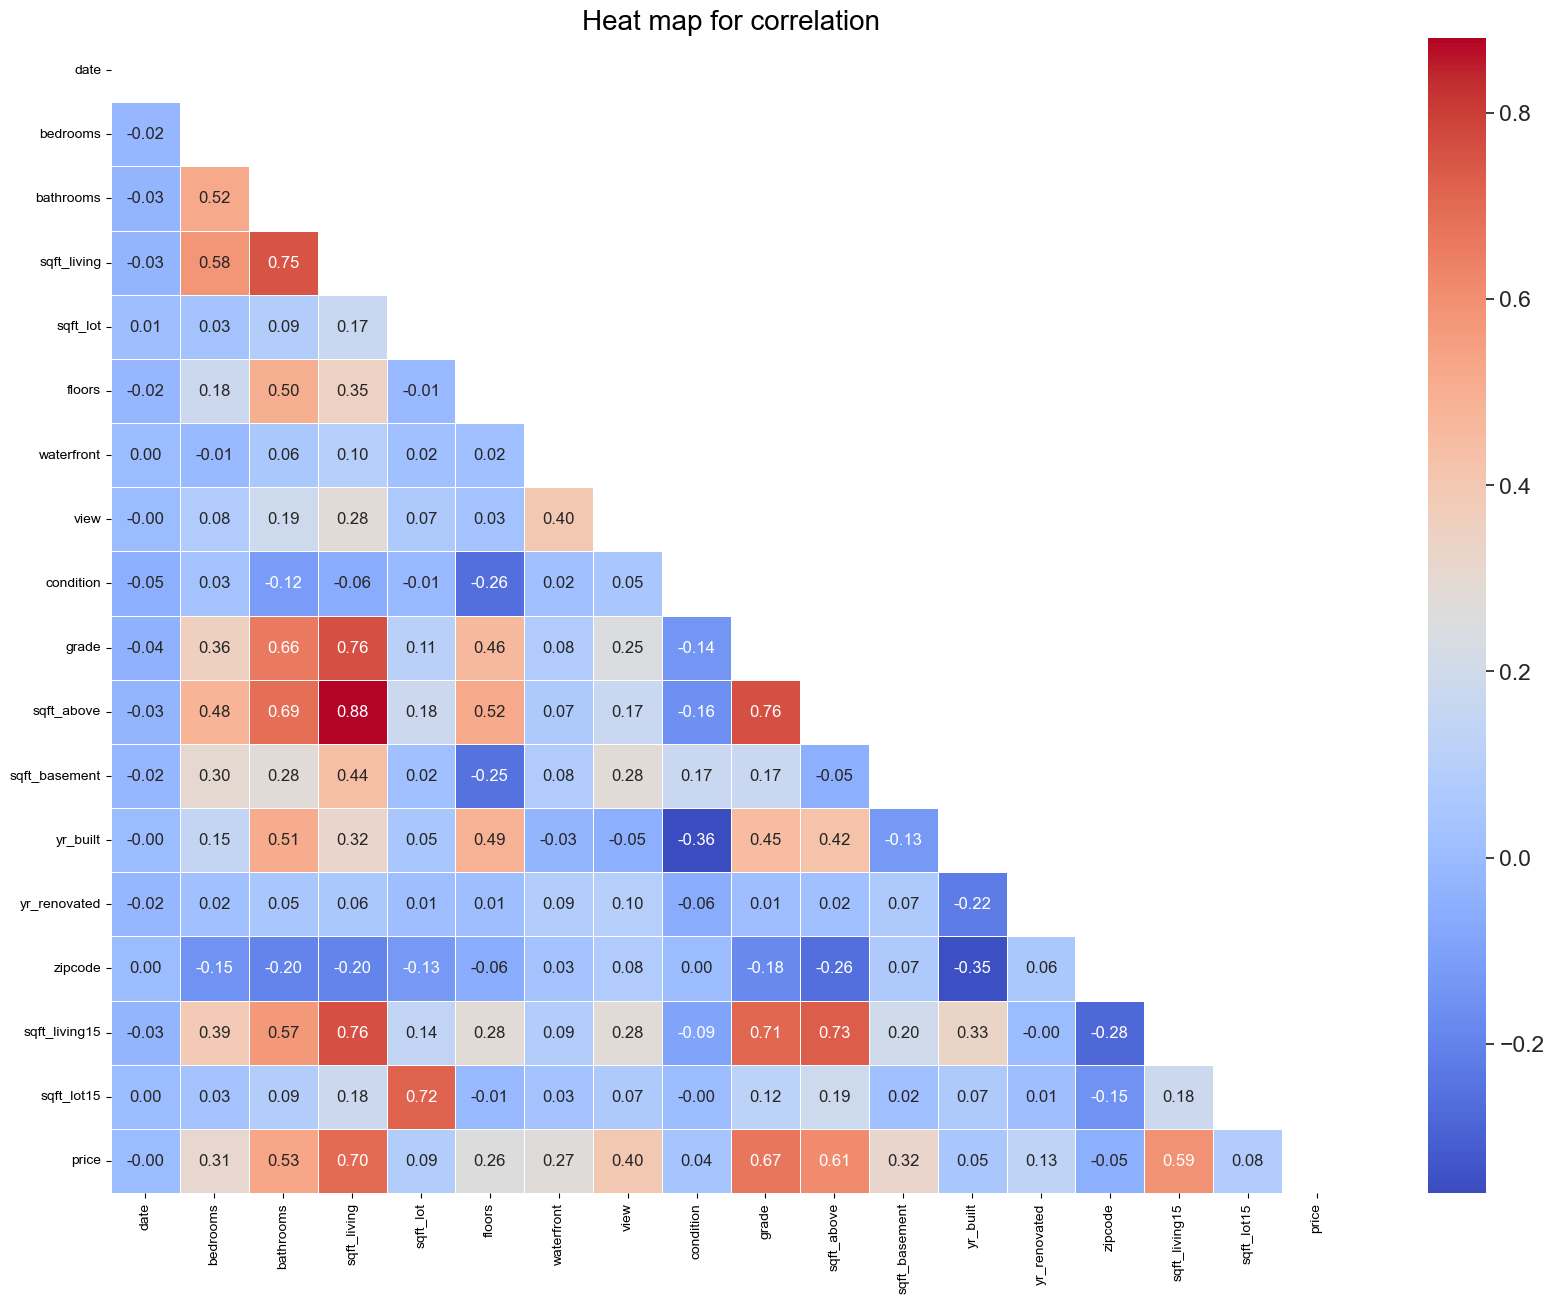

In [45]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Heat map for correlation", fontsize=20) 
plt.show()

In [46]:
corr_with_sale_price = df.corrwith(df["price"]).sort_values(ascending=False)

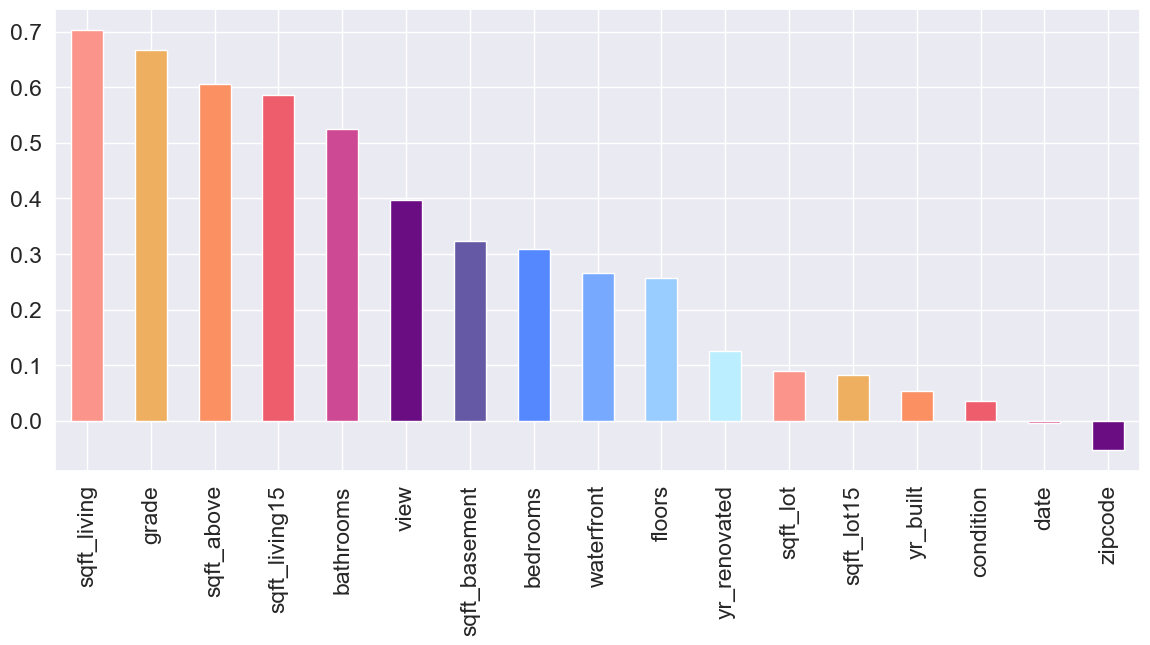

In [47]:
plt.figure(figsize=(14,6))
colors = ['#fb958b','#eeaf61', '#fb9062', '#ee5d6c', '#ce4993','#6a0d83','#6558a5','#5588ff','#77aaff','#99ccff','#bbeeff']
corr_with_sale_price.drop("price").plot.bar(color = colors)
plt.show();

In [48]:
#df.yr_built.value_counts()

<h3 style="color: #ff4d02;">Portfolio Analysis of SQFT</h3>

<h3 style="color: #ff4d02;">Year built</h3>

<h3 style="color: #ff4d02;">Zipe code</h3>

In [49]:
area_price_df = df.groupby('zipcode')['price'].mean().reset_index()

In [50]:
area_price_df_sorted = area_price_df.sort_values(by='price', ascending=False).head(10)
area_price_df_sorted

zipcode         price
24    98039  2.160607e+06
3     98004  1.355927e+06
25    98040  1.194230e+06
48    98112  1.095499e+06
41    98102  9.012583e+05
47    98109  8.796236e+05
43    98105  8.628252e+05
5     98006  8.596848e+05
53    98119  8.494480e+05
4     98005  8.101649e+05

<h1 style="color: #4d1b7b;">Data Processing</h1>

<h3 style="color: #c79dd7;"> Train-Test Split </h3>

In [51]:
y = df.price
X = df.drop(['price','sqft_above'],axis=1)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'100% of data: {len(df)}')
print(f'70% for train: {X_train.shape[0]}')
print(f'30% for test: {X_test.shape[0]}')

100% of data: 21613
70% for train: 15129
30% for test: 6484


<h3 style="color: #c79dd7;">Model-Linear Regression </h3>

In [54]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

<h3 style="color: #c79dd7;">Model Validation and Metrics </h3>

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_pred

array([ 522696.28099246,  676880.47814487, 1222671.64744824, ...,
        282976.73218259,  856573.62483124,  478542.94386873])

In [57]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.6534934385386475
Train data accuracy:  0.6549371081068369


In [58]:
pd.set_option('display.max_rows', None)
eval_df = pd.DataFrame({"actual":y_test,"pred":y_pred})
eval_df

actual          pred
id                                 
2591820310   365000.0  5.226963e+05
7974200820   865000.0  6.768805e+05
7701450110  1038000.0  1.222672e+06
9522300010  1490000.0  1.606630e+06
9510861140   711000.0  6.797742e+05
1761300310   211000.0  3.424363e+05
7732410120   790000.0  7.462532e+05
7010701383   680000.0  4.503053e+05
291310170    384500.0  3.890198e+05
4232901990   605000.0  4.533217e+05
6840701125   638000.0  6.583949e+05
3971700580   385000.0  4.665165e+05
4202400078   175000.0  3.328265e+05
6064800090   365000.0  3.614743e+05
2626119028   160000.0  3.648599e+05
3303980660  1070000.0  1.224931e+06
862000020    800000.0  2.763755e+05
2386000070   795127.0  1.100130e+06
1138000450   355000.0  2.512189e+05
1775800420   474000.0  5.079802e+05
2291401425   485000.0  3.228958e+05
2025770560   930000.0  1.501507e+06
3525069037   920000.0  6.979915e+05
9324800450   560000.0  8.081641e+05
8080400136   654000.0  4.087164e+05
8651540040   549000.0  5.196446e+05
9407001790   290000.0  2.094155e+05
1773101530   275000.0  1.029636e+05
9432900250   329990.0  5.602126e+05
1794500695   750000.0  5.710615e+05
2220069003   425000.0  4.734069e+05
923000120    515000.0  5.805156e+05
5728000060   605000.0  5.080650e+05
16000200     250000.0  6.192121e+05
1926059094   330000.0  3.677603e+05
6672900220   984000.0  7.856469e+05
3629860060   827500.0  9.655862e+05
1822069109   485000.0  6.209758e+05
6675500105   306000.0  2.801060e+05
249000180   1890000.0  1.087796e+06
226059065    514000.0  4.918407e+05
396100110    282613.0  1.532913e+05
9264450460   309000.0  4.467800e+05
7853361210   400000.0  2.673291e+05
9474700020   310000.0  7.386308e+04
421000455    253200.0  1.217426e+05
3755200220   334009.0  2.507777e+05
7960100075   500000.0  2.791912e+05
9477100490   441500.0  3.500801e+05
9138100350   685000.0  8.761233e+05
1624049275   327000.0  2.657377e+05
2770606890   450000.0  2.359645e+05
1157200189   356000.0  7.284078e+05
2770601800   525000.0  3.149859e+05
9301300805   675000.0  3.151046e+05
2325069032   875000.0  1.298945e+06
1021079099   345000.0  4.920023e+05
7215730040   695000.0  7.794368e+05
1853200080   350000.0  4.492883e+05
3224600340   695000.0  7.176791e+05
3222049120   400000.0  6.242113e+05
2113700025   330000.0  3.429799e+05
7893207925   265000.0  2.103682e+05
3586501085   630000.0  5.657405e+05
8024200010   312000.0  4.683913e+05
7116500705   156000.0  2.075667e+05
1598600209   300000.0  4.638892e+05
7204200025  1225000.0  1.596541e+06
4206901505   465000.0  4.420170e+05
2937300440   923990.0  8.107388e+05
7205000180   320000.0  5.184866e+05
8718500665   375000.0  2.944705e+05
5318101765   985000.0  7.331087e+05
4122700020   850000.0  5.660336e+05
8078700020   474900.0  5.033535e+05
3303980680   997000.0  1.131320e+06
8924100372  1302000.0  9.653023e+05
2781270210   209900.0  1.171505e+05
519000043    602000.0  4.162184e+05
3225069301  1228000.0  1.643050e+06
151000075    856000.0  5.857799e+05
2297400020   392000.0  3.886473e+05
6617500085   500000.0  7.650081e+05
104510180    230000.0  3.104187e+05
3528900060  1145000.0  8.929940e+05
3345100286   560000.0  7.318192e+05
1226039130   355000.0  5.725420e+05
8712100720   785000.0  6.571465e+05
3037200010   447500.0  2.557587e+05
3626039268   540000.0  4.787358e+05
104510230    252000.0  3.384956e+05
5112800060   455000.0  4.141311e+05
6072400280   619850.0  5.963300e+05
5317100570  1250000.0  8.990812e+05
9528102993   495000.0  3.537769e+05
2919201095   540000.0  4.344499e+05
6181400920   286651.0  3.599281e+05
185000161    261000.0  3.841270e+05
8691400010   830000.0  8.452283e+05
3345700165   450000.0  6.060496e+05
6151800486   260000.0  1.275260e+05
4340000080  1450000.0  9.131739e+05
4136960010   480000.0  1.057799e+06
3634100030   270000.0  4.445760e+05
1624059224  1160000.0  1.163862e+06
2788400090   250000.0  3.569587e+05
9828200762   650000.0  4.819987e+05
7524400250   589950.0  5.655558e+05
3528000290   743700.0  8.223640e+05
5700003630  1925000

In [59]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df

actual          pred           dif
id                                               
2591820310   365000.0  5.226963e+05  1.576963e+05
7974200820   865000.0  6.768805e+05  1.881195e+05
7701450110  1038000.0  1.222672e+06  1.846716e+05
9522300010  1490000.0  1.606630e+06  1.166295e+05
9510861140   711000.0  6.797742e+05  3.122585e+04
1761300310   211000.0  3.424363e+05  1.314363e+05
7732410120   790000.0  7.462532e+05  4.374682e+04
7010701383   680000.0  4.503053e+05  2.296947e+05
291310170    384500.0  3.890198e+05  4.519833e+03
4232901990   605000.0  4.533217e+05  1.516783e+05
6840701125   638000.0  6.583949e+05  2.039492e+04
3971700580   385000.0  4.665165e+05  8.151652e+04
4202400078   175000.0  3.328265e+05  1.578265e+05
6064800090   365000.0  3.614743e+05  3.525713e+03
2626119028   160000.0  3.648599e+05  2.048599e+05
3303980660  1070000.0  1.224931e+06  1.549315e+05
862000020    800000.0  2.763755e+05  5.236245e+05
2386000070   795127.0  1.100130e+06  3.050032e+05
1138000450   355000.0  2.512189e+05  1.037811e+05
1775800420   474000.0  5.079802e+05  3.398024e+04
2291401425   485000.0  3.228958e+05  1.621042e+05
2025770560   930000.0  1.501507e+06  5.715070e+05
3525069037   920000.0  6.979915e+05  2.220085e+05
9324800450   560000.0  8.081641e+05  2.481641e+05
8080400136   654000.0  4.087164e+05  2.452836e+05
8651540040   549000.0  5.196446e+05  2.935544e+04
9407001790   290000.0  2.094155e+05  8.058451e+04
1773101530   275000.0  1.029636e+05  1.720364e+05
9432900250   329990.0  5.602126e+05  2.302226e+05
1794500695   750000.0  5.710615e+05  1.789385e+05
2220069003   425000.0  4.734069e+05  4.840694e+04
923000120    515000.0  5.805156e+05  6.551563e+04
5728000060   605000.0  5.080650e+05  9.693495e+04
16000200     250000.0  6.192121e+05  3.692121e+05
1926059094   330000.0  3.677603e+05  3.776033e+04
6672900220   984000.0  7.856469e+05  1.983531e+05
3629860060   827500.0  9.655862e+05  1.380862e+05
1822069109   485000.0  6.209758e+05  1.359758e+05
6675500105   306000.0  2.801060e+05  2.589403e+04
249000180   1890000.0  1.087796e+06  8.022035e+05
226059065    514000.0  4.918407e+05  2.215929e+04
396100110    282613.0  1.532913e+05  1.293217e+05
9264450460   309000.0  4.467800e+05  1.377800e+05
7853361210   400000.0  2.673291e+05  1.326709e+05
9474700020   310000.0  7.386308e+04  2.361369e+05
421000455    253200.0  1.217426e+05  1.314574e+05
3755200220   334009.0  2.507777e+05  8.323129e+04
7960100075   500000.0  2.791912e+05  2.208088e+05
9477100490   441500.0  3.500801e+05  9.141989e+04
9138100350   685000.0  8.761233e+05  1.911233e+05
1624049275   327000.0  2.657377e+05  6.126235e+04
2770606890   450000.0  2.359645e+05  2.140355e+05
1157200189   356000.0  7.284078e+05  3.724078e+05
2770601800   525000.0  3.149859e+05  2.100141e+05
9301300805   675000.0  3.151046e+05  3.598954e+05
2325069032   875000.0  1.298945e+06  4.239446e+05
1021079099   345000.0  4.920023e+05  1.470023e+05
7215730040   695000.0  7.794368e+05  8.443683e+04
1853200080   350000.0  4.492883e+05  9.928833e+04
3224600340   695000.0  7.176791e+05  2.267912e+04
3222049120   400000.0  6.242113e+05  2.242113e+05
2113700025   330000.0  3.429799e+05  1.297990e+04
7893207925   265000.0  2.103682e+05  5.463185e+04
3586501085   630000.0  5.657405e+05  6.425948e+04
8024200010   312000.0  4.683913e+05  1.563913e+05
7116500705   156000.0  2.075667e+05  5.156672e+04
1598600209   300000.0  4.638892e+05  1.638892e+05
7204200025  1225000.0  1.596541e+06  3.715405e+05
4206901505   465000.0  4.420170e+05  2.298299e+04
2937300440   923990.0  8.107388e+05  1.132512e+05
7205000180   320000.0  5.184866e+05  1.984866e+05
8718500665   375000.0  2.944705e+05  8.052946e+04
5318101765   985000.0  7.331087e+05  2.518913e+05
4122700020   850000.0  5.660336e+05  2.839664e+05
8078700020   474900.0  5.033535e+05  2.845347e+04
3303980680   997000.0  1.131320e+06  1.343201e+05
8924100372  1302000.0  9.653023e+05  3.366977e+05
2781270210   209900.0  1.171505e+05  9.274951e+04
519000043    60

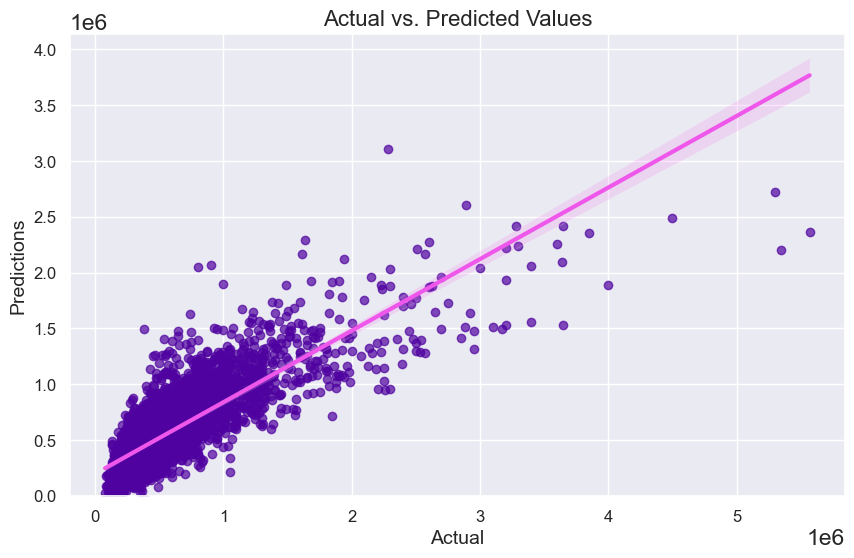

In [60]:
scatter_color = "#4f02a0"
line_color = "#ef57eb"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [61]:
r2_1 = r2_score(y_test, y_pred)
RMSE_1 = mean_squared_error(y_test, y_pred, squared=False)
MSE_1 = mean_squared_error(y_test, y_pred)
MAE_1 = mean_absolute_error(y_test, y_pred)

print("R2 = ", round(r2_1, 4))
print("RMSE = ", round(RMSE_1, 4))
print("MSE =  ", round(MSE_1, 4)) 
print("MAE = ", round(MAE_1, 4))

R2 =  0.6535
RMSE =  223660.3462
MSE =   50023950453.4546
MAE =  142996.9219


Conclusion:
While this model has moderate explanatory power (R²), the prediction errors (RMSE, MSE, and MAE) indicate that there is significant room for improvement. Analyzing and understanding high-value properties can provide deeper insights, potentially revealing patterns and characteristics that could help refine your model and improve its accuracy.

<h3 style="color: #c79dd7;">Model: Ridge Regression </h3>

In [62]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

<h3 style="color: #c79dd7;">Model Validation and Metrics </h3>

In [63]:
predictions_ridge = ridge.predict(X_test)

In [64]:
r2_2 = r2_score(y_test, predictions_ridge)
RMSE_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_2 = mean_squared_error(y_test, predictions_ridge)
MAE_2 = mean_absolute_error(y_test, predictions_ridge)

print("R2 = ", round(r2_2, 4))
print("RMSE = ", round(RMSE_2, 4))
print("MSE = ", round(MSE_2, 4))
print("MAE = ", round(MAE_2, 4))

R2 =  0.6534
RMSE =  223682.2719
MSE =  50033758765.1449
MAE =  143003.9216


Lasso Regression

In [65]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [66]:
predictions_lasso = lasso.predict(X_test)

In [67]:
r2_3 = r2_score(y_test, predictions_lasso)
RMSE_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3 = mean_absolute_error(y_test, predictions_lasso)

print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE = ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.6535
RMSE =  223661.0496
MSE =  50024265127.5151
MAE =  142997.1642


Decision Tree

In [68]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [69]:
predictions_tree = tree.predict(X_test)

In [70]:
r2_4 = r2_score(y_test, predictions_tree)
RMSE_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_4 = mean_squared_error(y_test, predictions_tree)
MAE_4 = mean_absolute_error(y_test, predictions_tree)

print("R2 = ", round(r2_4, 4))
print("RMSE = ", round(RMSE_4, 4))
print("MSE = ", round(MSE_4, 4))
print("MAE = ", round(MAE_4, 4))

R2 =  0.6022
RMSE =  239646.7133
MSE =  57430547194.5487
MAE =  127913.9935


Model: KNN Regression

In [71]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [72]:
predictions_knn = knn.predict(X_test)

In [73]:
r2_5 = r2_score(y_test, predictions_knn)
RMSE_5 = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_5 = mean_squared_error(y_test, predictions_knn)
MAE_5 = mean_absolute_error(y_test, predictions_knn)

print("R2 = ", round(r2_5, 4))
print("RMSE = ", round(RMSE_5, 4))
print("MSE = ", round(MSE_5, 4))
print("MAE = ", round(MAE_5, 4))

R2 =  0.4814
RMSE =  273611.0778
MSE =  74863021883.8008
MAE =  165269.8363


Model: XGBoost Regression

In [74]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [75]:
predictions_xgb = xgbr.predict(X_test)

In [76]:
r2_6 = r2_score(y_test, predictions_xgb)
RMSE_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_6 = mean_squared_error(y_test, predictions_xgb)
MAE_6 = mean_absolute_error(y_test, predictions_xgb)

print("R2 = ", round(r2_6, 4))
print("RMSE = ", round(RMSE_6, 4))
print("MSE = ", round(MSE_6, 4))
print("MAE = ", round(MAE_6, 4))

R2 =  0.6777
RMSE =  215690.5253
MSE =  46522402684.4673
MAE =  130857.8979


Final comparison

In [77]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6],
    'RMSE': [RMSE_1, RMSE_2, RMSE_3, RMSE_4, RMSE_5, RMSE_6],
    'MSE': [MSE_1, MSE_2, MSE_3, MSE_4, MSE_5, MSE_6],
    'MAE': [MAE_1, MAE_2, MAE_3, MAE_4, MAE_5, MAE_6]
}

In [78]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model")

R²           RMSE           MSE            MAE
Model                                                                  
Linear Regression  0.653493  223660.346180  5.002395e+10  142996.921897
Ridge              0.653425  223682.271906  5.003376e+10  143003.921578
Lasso              0.653491  223661.049643  5.002427e+10  142997.164179
Decision Tree      0.602189  239646.713298  5.743055e+10  127913.993523
KNN                0.481438  273611.077780  7.486302e+10  165269.836336
XGBoost            0.677748  215690.525254  4.652240e+10  130857.897876

# Further improvement

<h2 style="color: #FF6347;">Normalization with MinMaxScaler</h2>

In [79]:
from sklearn.preprocessing import MinMaxScaler 

In [80]:
scaler = MinMaxScaler()

In [81]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [83]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("MSE = ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8274
RMSE =  157867.1724
MSE =  24922044121.1908
MAE =  79850.365


<h2 style="color: #FF6347;">Normalization with StandardScaler</h2>

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [87]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 8))
print("RMSE = ", round(RMSE_3_7, 8))
print("The value of the metric MSE is ", round(MSE_3_7, 8))
print("MAE = ", round(MAE_3_7, 8))

R2 =  0.82736966
RMSE =  157867.17239879
The value of the metric MSE is  24922044121.190796
MAE =  79850.36499942


In [88]:
eval_df_norm = pd.DataFrame({"actual":y_test,"pred":predictions_xgb_2})

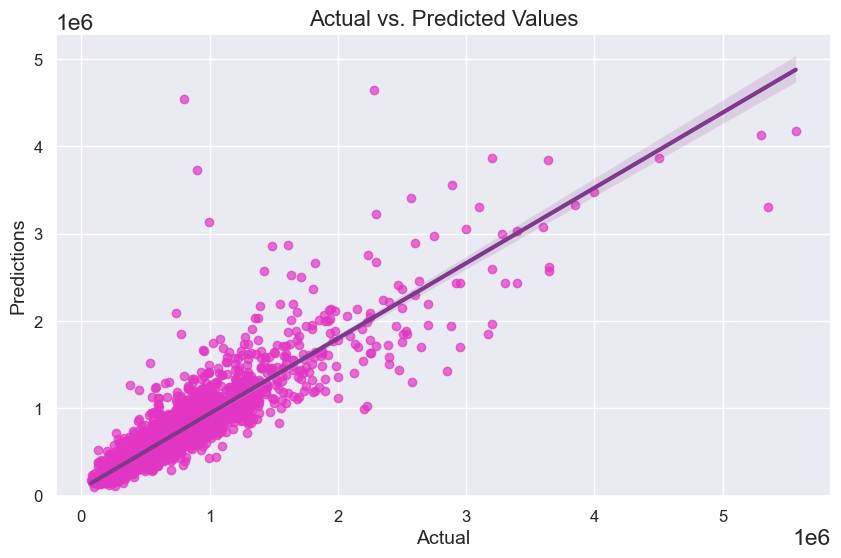

In [89]:
scatter_color = "#e235c3"
line_color = "#7f388b"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df_norm,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h2 style="color: #FF6347;">Normalization with Log Transform</h2>

In [90]:
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [91]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [92]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 10))
print("RMSE = ", round(RMSE_3_7, 10))
print("The value of the metric MSE is ", round(MSE_3_7, 10))
print("MAE = ", round(MAE_3_7, 10))

R2 =  0.8273696552
RMSE =  157867.1723987948
The value of the metric MSE is  24922044121.190792
MAE =  79850.3649994216


In [93]:
# log transform

In [94]:
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [95]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [96]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8274
RMSE =  157867.1724
The value of the metric MSE is  24922044121.1908
MAE =  79850.365


<h2 style="color: #FF6347;">Try it with dealing with outliers</h2>

In [97]:
def outlier_slayer(data,columns_to_modify): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in columns_to_modify:
        if column in data.columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [ ]:
#df_numerical= df['']

In [98]:
columns_to_modify = ['sqft_living', 'sqft_lot','sqft_basement','sqft_living15','sqft_lot15','price']

In [101]:
cleaned_df = outlier_slayer(df, columns_to_modify)

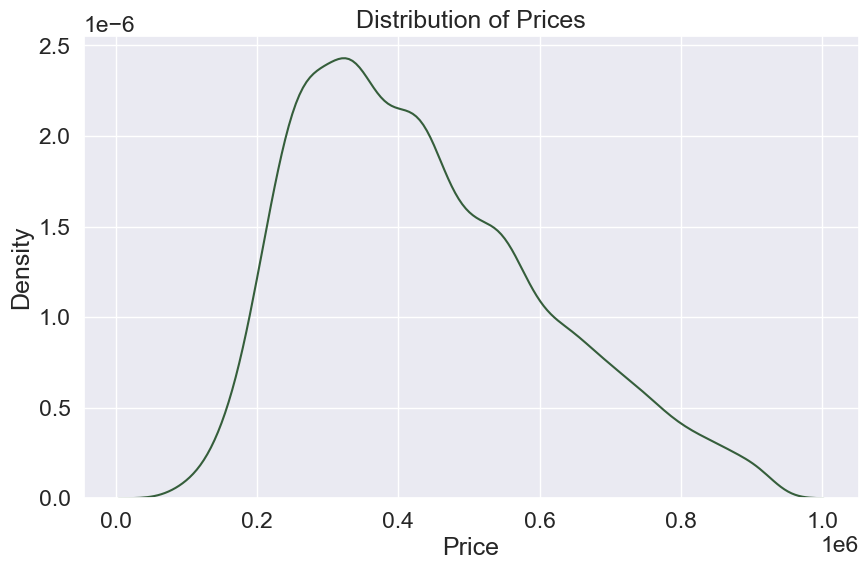

In [138]:
plt.figure(figsize=(10, 6))
sns.kdeplot(cleaned_df['price'], color='#355e3b')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.grid(True)
plt.show()

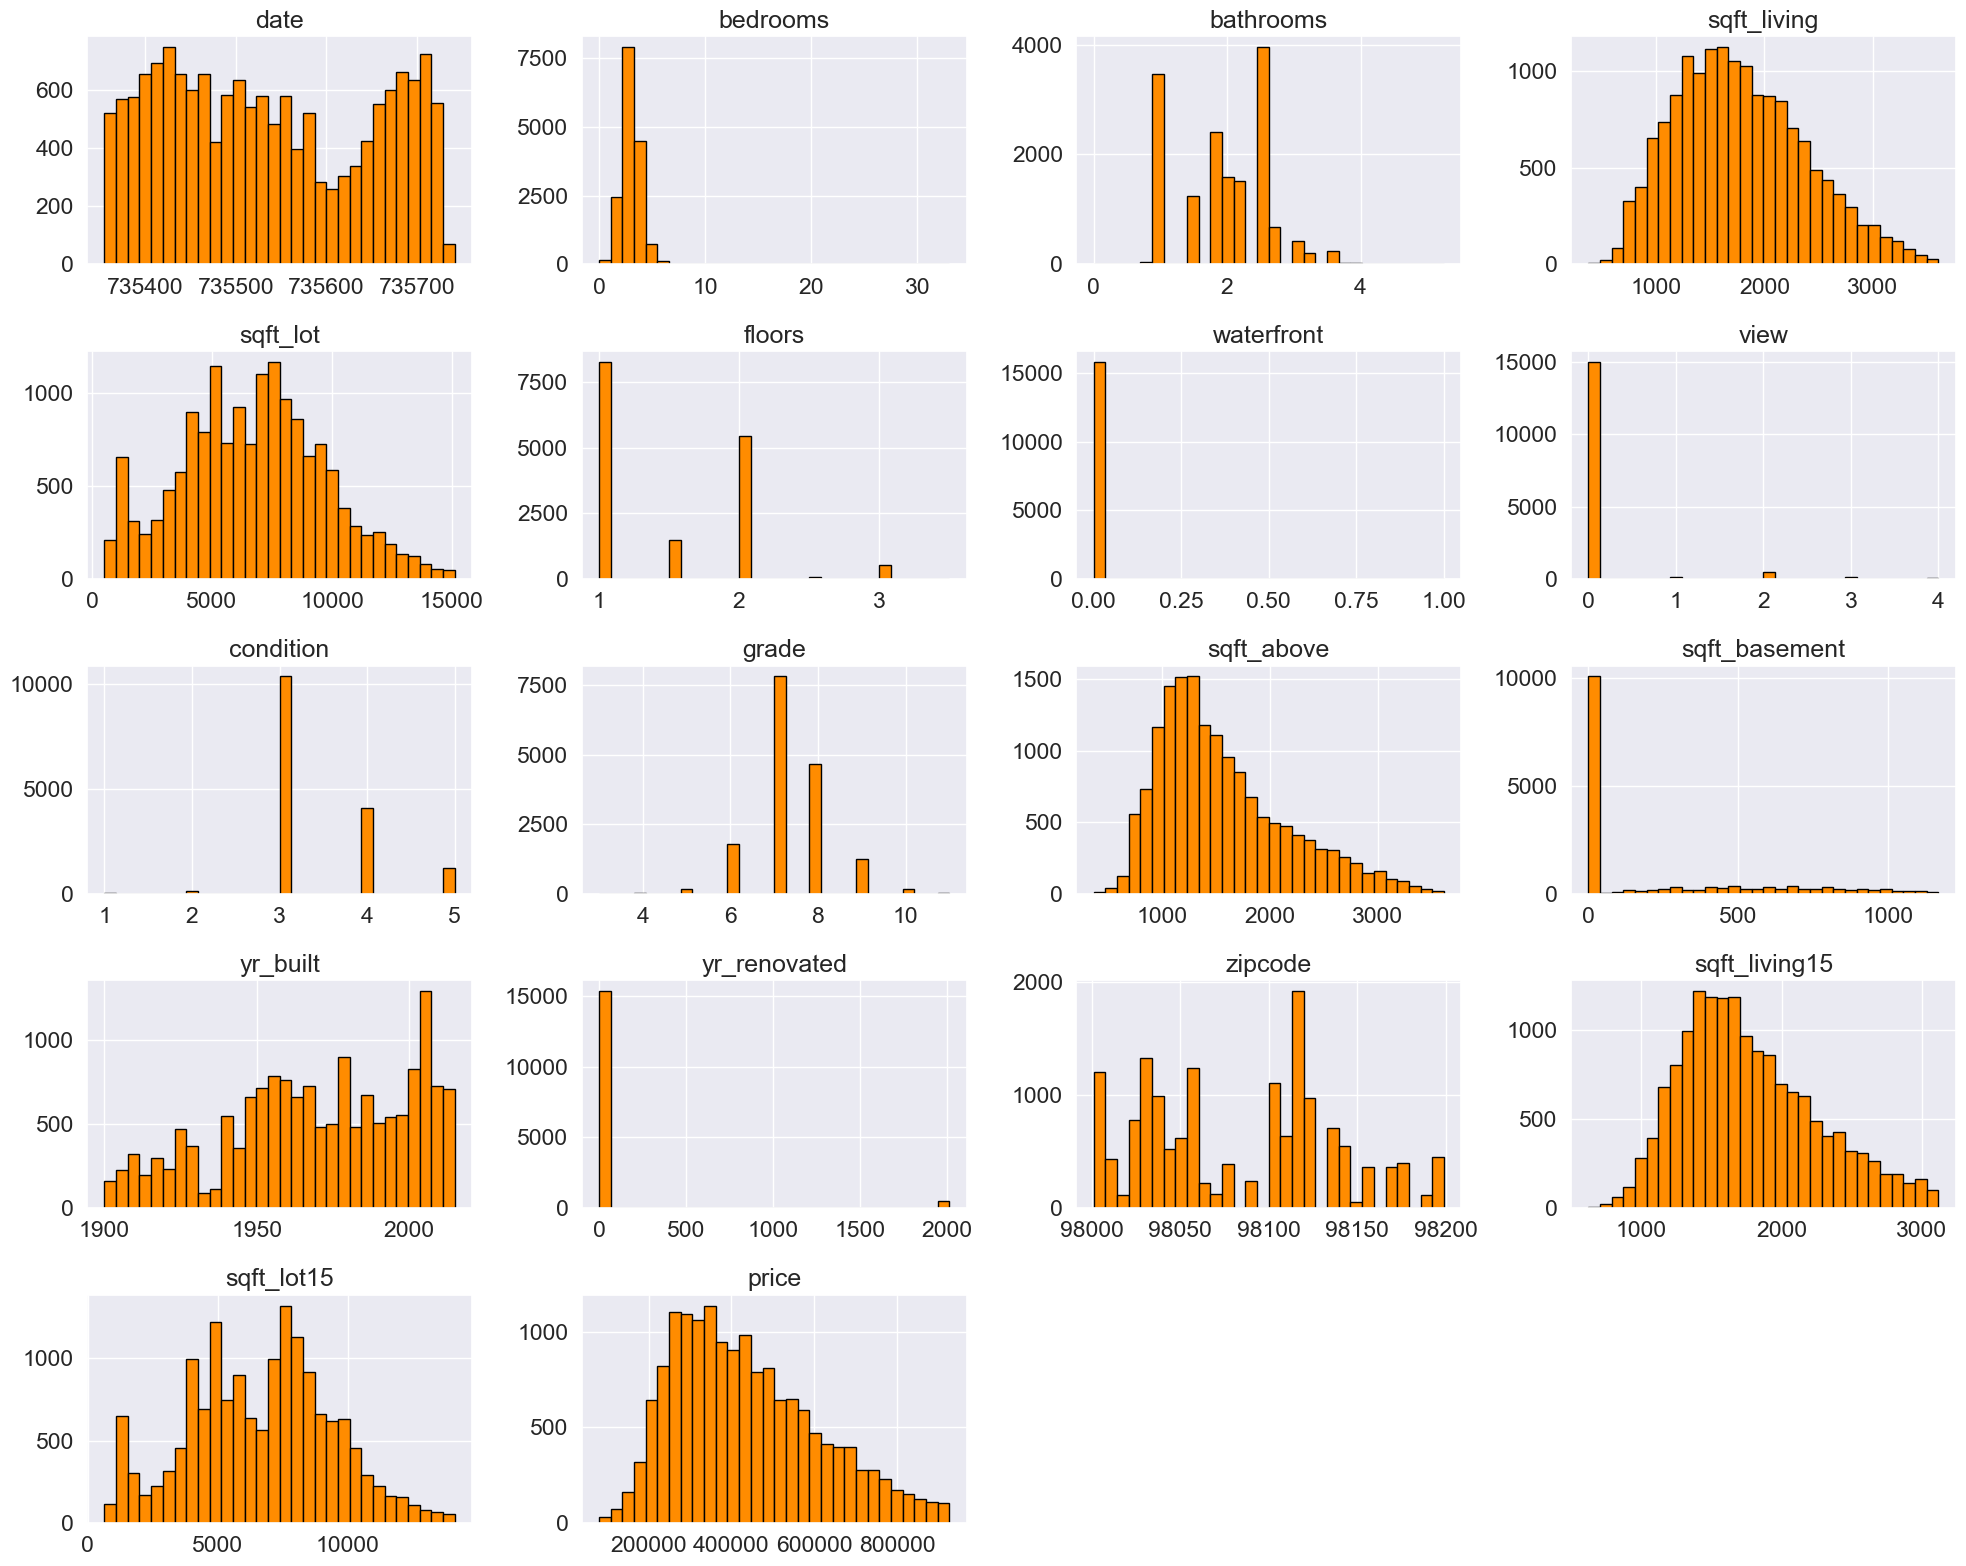

In [103]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(cleaned_df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(cleaned_df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(cleaned_df.columns[i])

plt.tight_layout()
plt.show()

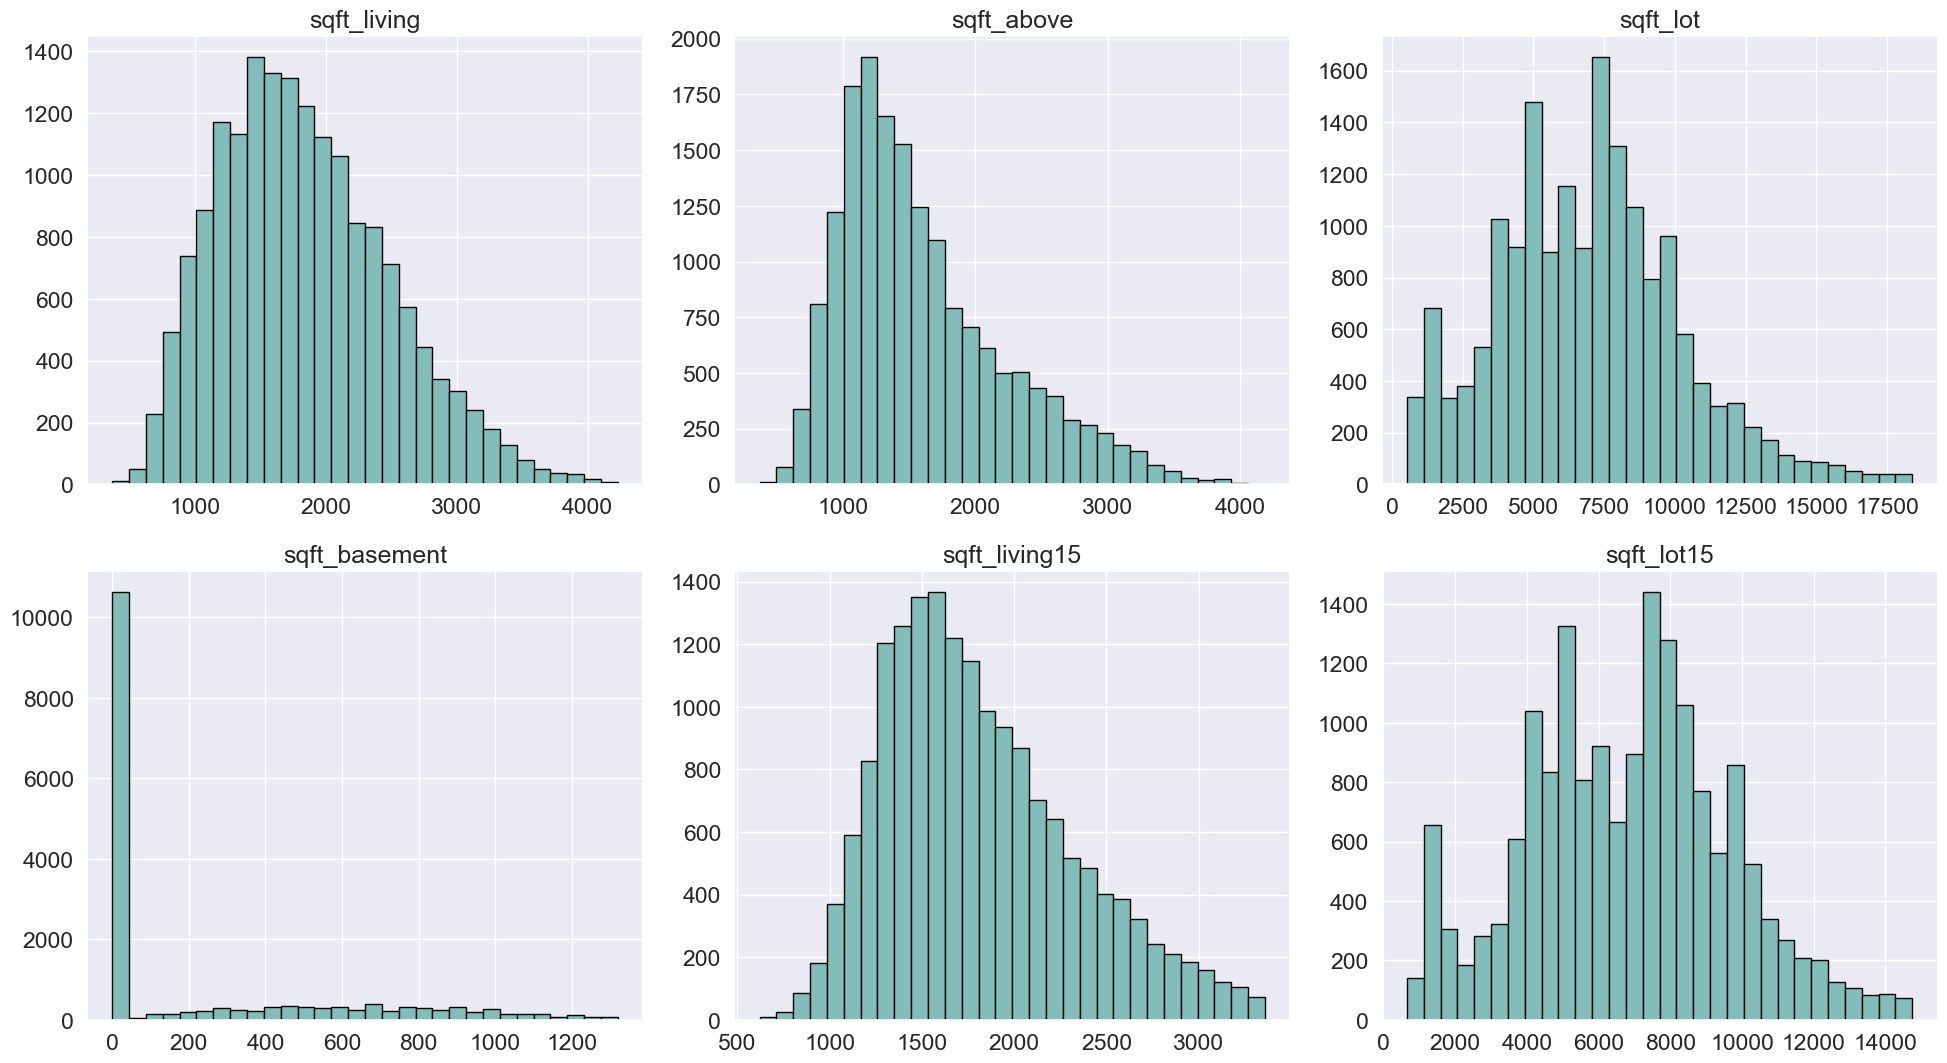

In [104]:
df_sqft = df[['sqft_living','sqft_above','sqft_lot','sqft_basement','sqft_living15','sqft_lot15']]

color = '#83bdba'

# grid size
nrows, ncols = 3, 3  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df_sqft.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df_sqft.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df_sqft.columns[i])

plt.tight_layout()
plt.show()

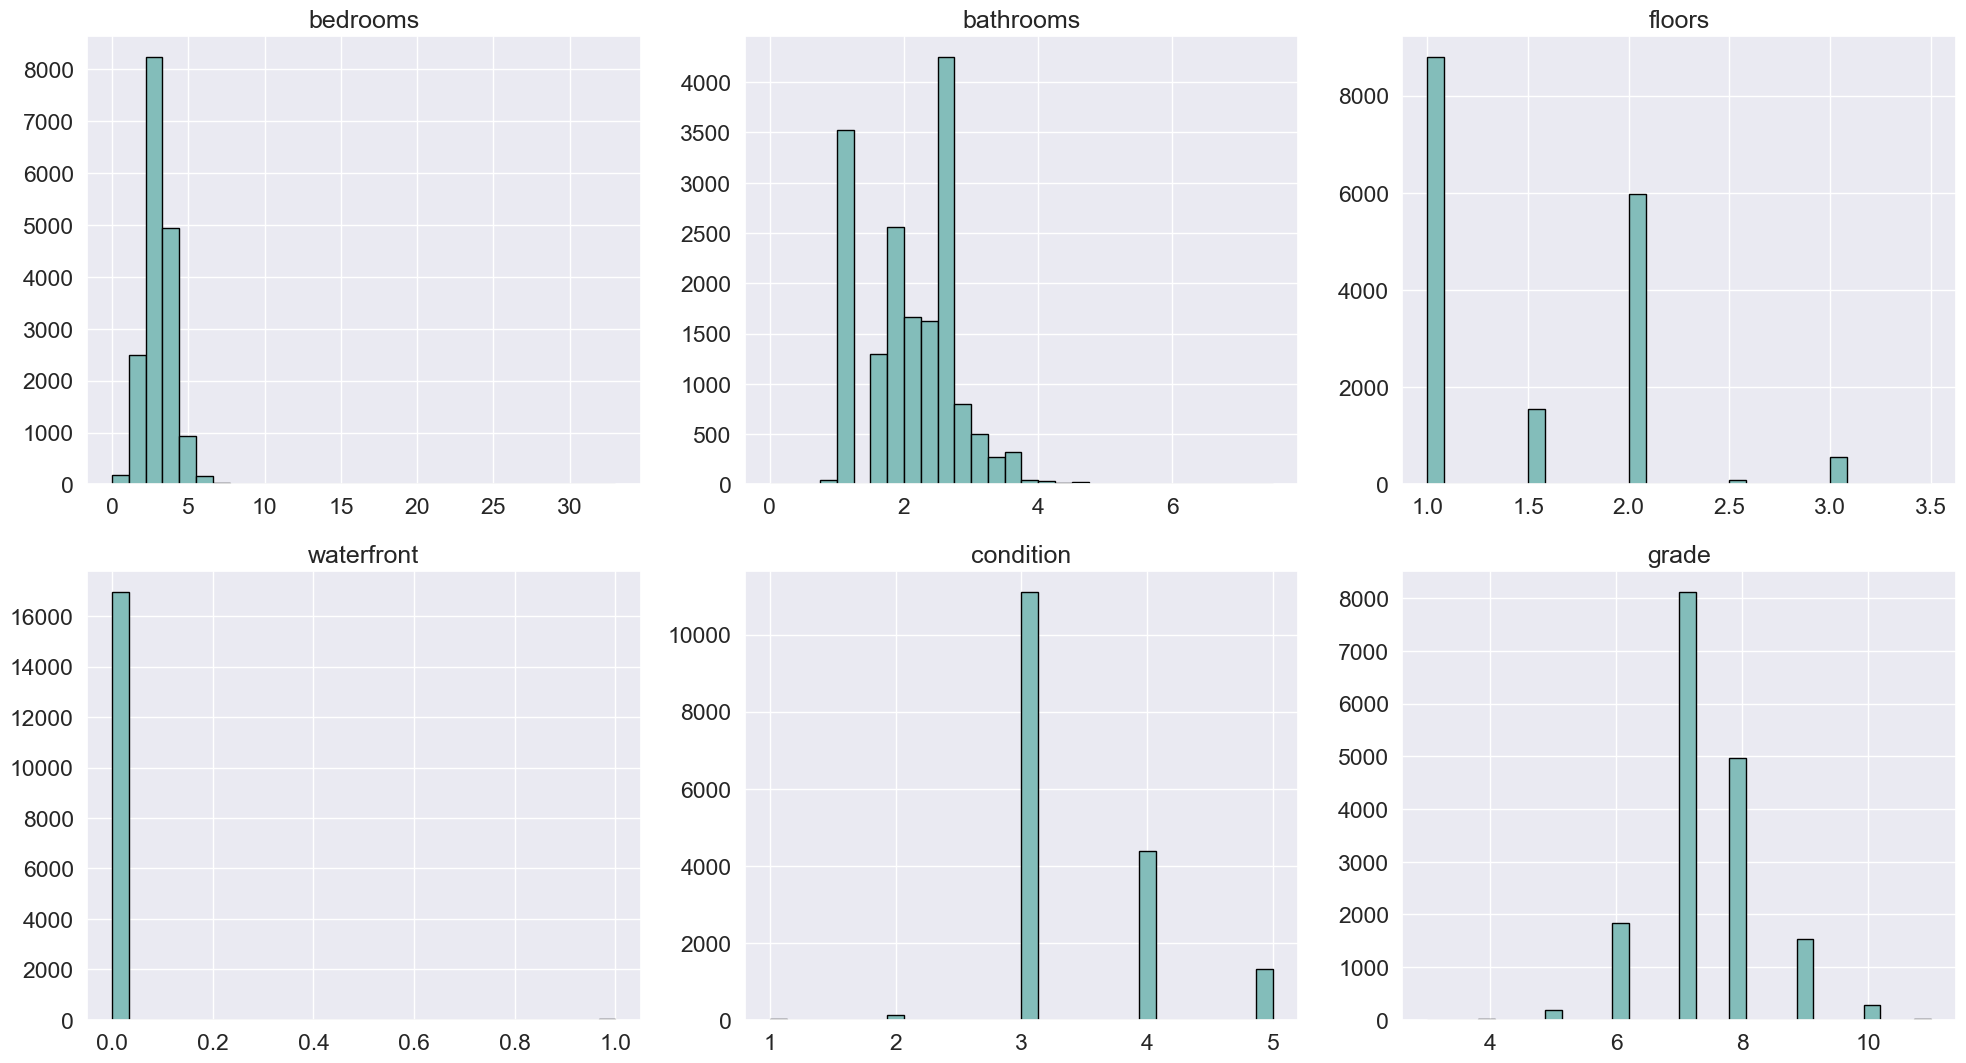

In [105]:
df_cat = df[['bedrooms', 'bathrooms','floors','waterfront', 'condition', 'grade',]]
color = '#83bdba'

# grid size
nrows, ncols = 3, 3  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df_cat.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df_cat.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df_cat.columns[i])

plt.tight_layout()
plt.show()

In [109]:
df[df['bedrooms']==33] # there is only one house with 33 bedrooms.

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                       
2402100895  735409        33       1.75         1620      6000     1.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
2402100895           0     0          5      7        1040            580   

            yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  \
id                                                                       
2402100895      1947             0    98103           1330        4700   

               price  
id                    
2402100895  640000.0

In [117]:
df.sort_values(by='sqft_living',ascending=False).head(20)

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                       
1778350160  735424         5       3.25         4230     10260     2.0   
6891100090  735520         5       3.50         4200      5400     2.0   
8691500990  735579         4       2.50         4190      7504     2.0   
5411600210  735457         4       3.50         4170      4322     2.0   
3127200021  735400         4       3.50         4140      7089     2.0   
6127000480  735494         5       3.50         4140      7642     2.0   
3888100128  735442         4       3.50         4120      7304     2.0   
3751600409  735726         4       2.50         4073     17334     2.0   
114101505   735711         5       3.50         4060      8309     2.0   
2771604120  735548         4       1.75         4060      4000     2.0   
3303860030  735535         4       2.50         4060      8547     2.0   
240000269   735622         4       4.50         4060     10800     2.0   
424049043   735456         9       7.50         4050      6504     2.0   
255520180   735585         3       2.50         4040      8653     2.0   
624111000   735450         3       3.00         4040     14338     2.0   
930000415   735571         4       2.75         4030     10240     2.0   
3117100130  735428         3       3.25         4030     12765     2.0   
2771600550  735549         4       3.50         4030      4200     3.0   
7228501805  735500         6       4.50         4000      7500     2.0   
9558040820  735423         6       3.75         4000      6015     2.0   

            waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                                                                          
1778350160           0     0          3     10        3860            370   
6891100090           0     0          3      9        3140           1060   
8691500990           0     0          3      7        4190              0   
5411600210           0     0          3      9        2940           1230   
3127200021           0     0          3     10        3160            980   
6127000480           0     0          3      8        4140              0   
3888100128           0     0          3     11        3070           1050   
3751600409           0     0          3      8        4073              0   
114101505            0     0          3      9        2960           1100   
2771604120           0     3          3     10        2890           1170   
3303860030           0     0          3      9        2790           1270   
240000269            0     0          3     10        4060              0   
424049043            0     0          3      7        4050              0   
255520180            0     0          3      9        2900           1140   
624111000            0     0          3     10        3030           1010   
930000415            0     2          3      8        3310            720   
3117100130           0     0          4      9        2800           1230   
2771600550           0     0          3      9        4030              0   
7228501805           0     0          3      7        4000              0   
9558040820           0     2          3     10        3080            920   

            yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  \
id                                                                       
1778350160      1996             0    98027           2980       10997   
6891100090      2012             0    98052           3300        5564   
8691500990      2004             0    98058           2480        6727   
5411600210      2005             0    98074           2970        4922   
3127200021      2003             0    98034           2640        8896   
6127000480      2003             0    98075           3330        6953   
3888100128      2006             0    98033           2470        9600   
3751600409      2008    

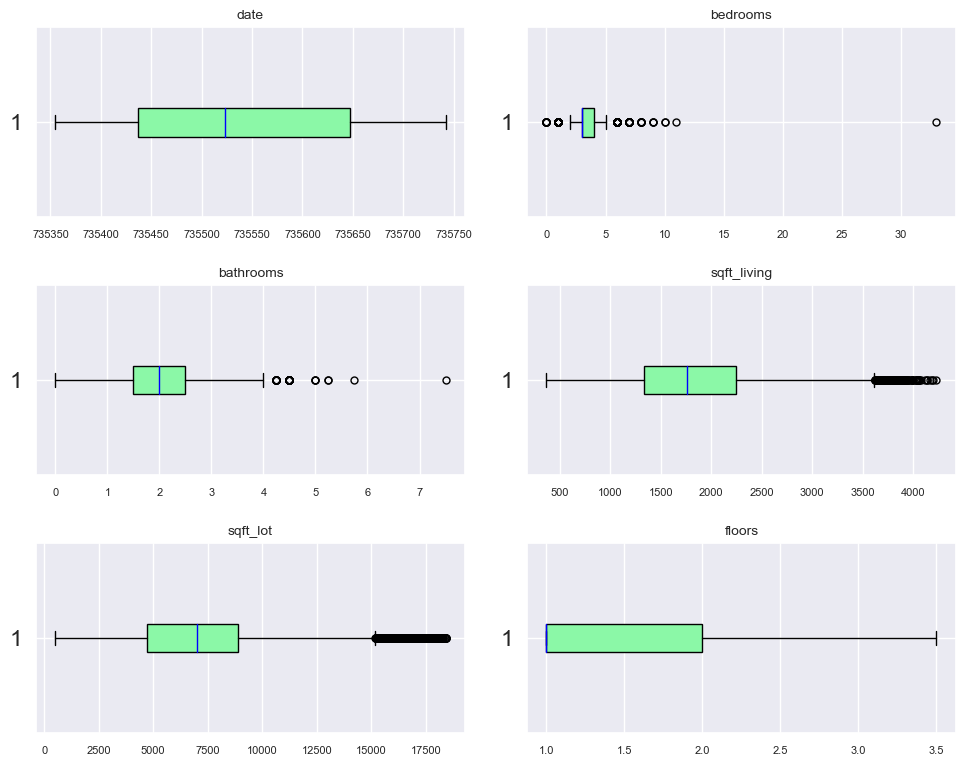

In [132]:
color = '#8bf8a7'

# grid size
nrows, ncols = 3, 2 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='blue'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

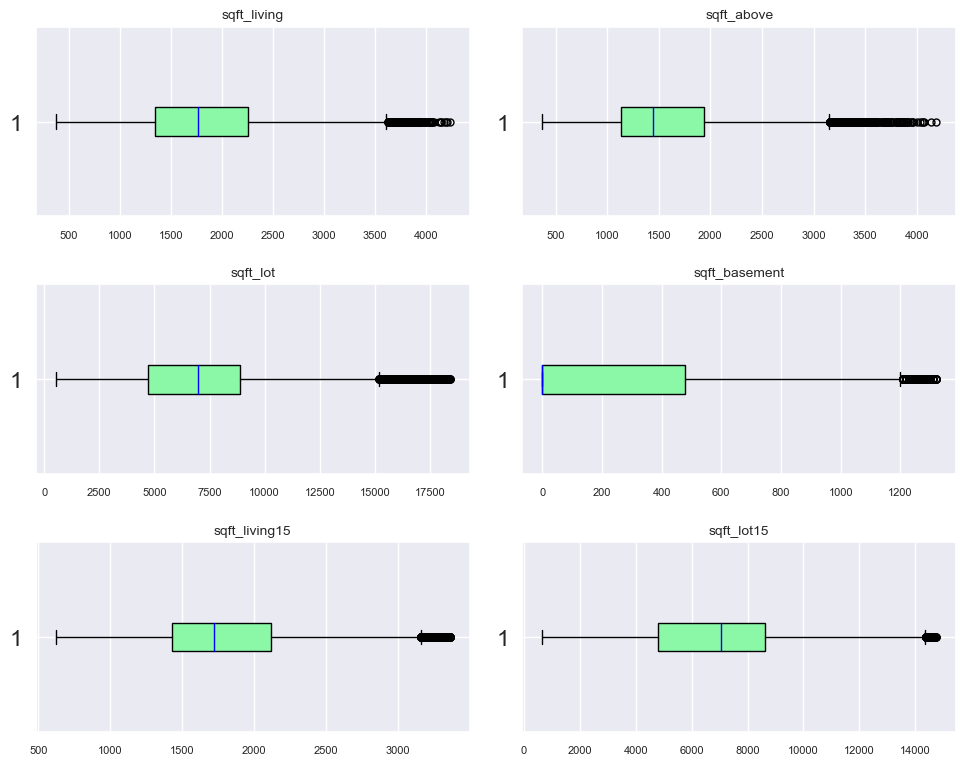

In [124]:
color = '#8bf8a7'

# grid size
nrows, ncols = 3, 2 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df_sqft.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df_sqft.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='blue'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df_sqft.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

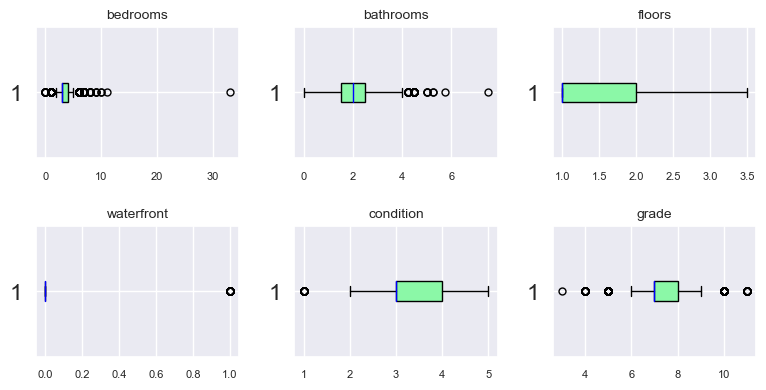

In [134]:
color = '#8bf8a7'

# grid size
nrows, ncols = 3, 3 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 6))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df_cat.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df_cat.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='blue'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df_cat.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [147]:
y = cleaned_df.price
X = cleaned_df.drop(['price','sqft_above'],axis=1)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [149]:
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train)
X_test_scaled3 = scaler.transform(X_test)

In [150]:
xgbr.fit(X_train_scaled3, y_train)
predictions_xgb_3 = xgbr.predict(X_test_scaled3)

In [151]:
R2 = r2_score(y_test, predictions_xgb_3)
RMSE = mean_squared_error(y_test, predictions_xgb_3,squared=False)
MSE = mean_squared_error(y_test, predictions_xgb_3)
MAE = mean_absolute_error(y_test, predictions_xgb_3)

print("R2=:", round(R2,4))
print("RMSE = ", round(RMSE,4))
print("MSE = ", round(MSE, 4))
print("MAE = ", round(MAE, 4))

R2=: 0.8298
RMSE =  71068.4148
MSE =  5050719586.7026
MAE =  51101.5363


In [152]:
eval_df_out = pd.DataFrame({'actual': y_test, 'pred': predictions_xgb_3})

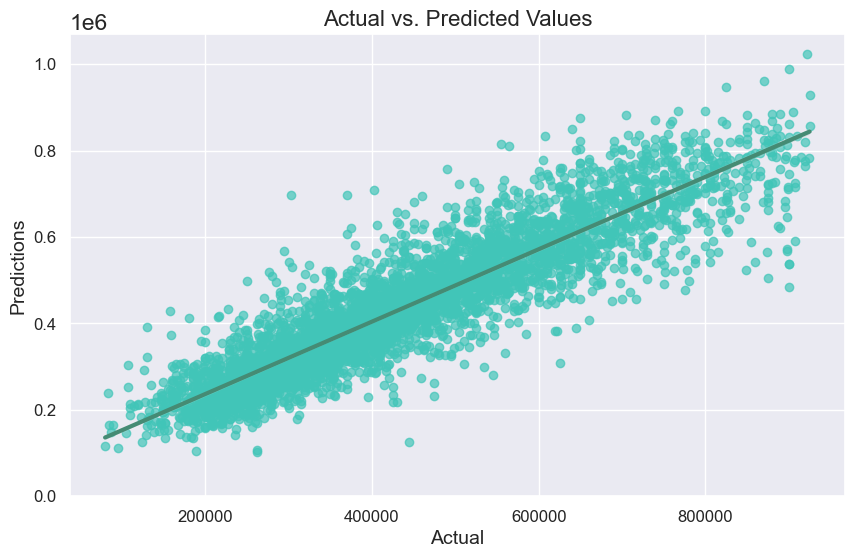

In [153]:
scatter_color = "#41c5b8"
line_color = "#458b74"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df_out,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h2 style="color: #ff4d02;">Price over 650K</h2>

In [154]:
#high_value_properties
df2 = df[df['price'] >= 650000]

In [155]:
y = df2.price
X = df2.drop(['price','sqft_above'],axis=1)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'100% of data: {len(df)}')
print(f'70% for train: {X_train.shape[0]}')
print(f'30% for test: {X_test.shape[0]}')

100% of data: 16969
70% for train: 1911
30% for test: 819


In [157]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [158]:
y_pred = model.predict(X_test)

In [159]:
r2_1 = r2_score(y_test, y_pred)
RMSE_1 = mean_squared_error(y_test, y_pred, squared=False)
MSE_1 = mean_squared_error(y_test, y_pred)
MAE_1 = mean_absolute_error(y_test, y_pred)

print("R2 = ", round(r2_1, 4))
print("RMSE = ", round(RMSE_1, 4))
print("MSE =  ", round(MSE_1, 4)) 
print("MAE = ", round(MAE_1, 4))

R2 =  0.1309
RMSE =  87452.2005
MSE =   7647887379.9388
MAE =  71641.7311


In [160]:
eval_df = pd.DataFrame({"actual":y_test,"pred":y_pred})
eval_df

actual           pred
id                                  
7987400475   745000.0  769735.627184
2255500123   747450.0  691129.734053
2581900284   821000.0  773282.427542
1563102880   849000.0  784920.084687
8832900550   650000.0  811749.509477
4038700680   750000.0  771157.358531
5315100806   940000.0  830466.170526
7936000463   838000.0  757621.762673
8820900029   700000.0  819096.819151
518500210    868500.0  796110.505219
6132600165   850000.0  826225.401886
8931100095   779000.0  756012.967006
3904902500   675000.0  796525.511251
1732800199   935000.0  729639.370891
579003240    720000.0  773044.878692
9829200325   765000.0  728004.694344
8682282070   920000.0  788133.057753
9485800050   680000.0  720852.900578
3630120700   757000.0  785921.641816
7905200315   711777.0  728594.972206
4139440610   746000.0  776339.702276
1732800194   840000.0  720830.366283
7640400070   665000.0  768147.055752
8819901030   810000.0  770129.320671
6788200931   710000.0  729925.683102
7517500610   781000.0  740846.773489
1176001117   705000.0  706389.253131
5710500060   688888.0  819648.570891
5104540330   679000.0  847375.046948
1982200245   726000.0  796065.253545
4083300070   870300.0  799054.522529
2326300090   865000.0  710304.999013
2804100095   724800.0  777222.384833
7732410420   809000.0  782539.724039
6666830390   779380.0  710843.960355
7785000230   970000.0  795926.126967
2592210150   822000.0  752556.173318
1377800135   676000.0  711266.387933
9831200221   670000.0  715173.139199
579000096    780000.0  760369.689197
2024059127   908950.0  787079.030312
7902200015   700000.0  763396.478499
5035300085   730000.0  724538.662093
1959701890   865000.0  799301.476476
2547200190   860000.0  775133.050599
4038600260   699900.0  725535.955721
2021200058   785000.0  737503.650495
3261000080   704111.0  770713.157505
4379400490   675000.0  746360.126567
2425059173   750000.0  750274.293599
5350200425   765000.0  712292.199240
3630200630   805000.0  775418.759637
3204300625   785950.0  768372.802385
7732410380   907500.0  792908.362122
5710610790   730100.0  777657.716569
9276202160   660000.0  751589.622228
6822100310   685000.0  753876.033473
3825311190   678000.0  764772.194642
8644210050   689000.0  821201.764029
1024049006   665000.0  788504.097839
6690500320   650000.0  730230.056963
4083300510   657100.0  703795.743829
6666830170   778983.0  711791.369416
2525059172   664000.0  775725.477078
8562790760   785000.0  810128.002336
5210200077   799000.0  753295.052435
7942601810   733500.0  796729.020679
7605800050  1000000.0  780054.715334
3591000030   728000.0  768802.879707
9492500170   879950.0  769559.893586
1829300210   762300.0  844925.561487
4151800470   675000.0  677731.148055
7215730310   726000.0  770398.360379
3867400130   810000.0  745384.253539
3213200180   700180.0  741297.409039
8819900220   686500.0  761372.046239
1959701695   950000.0  853353.496891
624100990    725000.0  773328.527771
3629970240   690000.0  780435.882393
7732410120   790000.0  794958.841915
9542400075   809950.0  804757.790659
9274201006   705000.0  815632.821744
4400200057   761000.0  715249.095738
7567600030   750000.0  880274.280898
3630110340   728725.0  774152.039164
9201000120   650000.0  729060.171428
3905090410   760000.0  811507.536734
7856610160   925000.0  794178.792368
3629700120   669950.0  717776.066251
9103000360   825000.0  795220.430433
3885805325   710000.0  728037.035878
3117100130   890000.0  850034.091629
7779200275   760000.0  782170.512078
3026059204   825500.0  766207.702280
1313000240   708000.0  770915.221142
1153000040   650000.0  770935.379460
3271300955   868000.0  795443.139463
3359500110   660000.0  783907.574202
7852170130   650000.0  796770.939445
1873100060   693000.0  719586.855368
5015001452   950000.0  744730.236448
7855800910   871000.0  797465.953017
1250202430   799000.0  785075.198558
7805450040   915557.0  837275.378295
2597490410   740000.0  730461.353502
3879900753   727000.0  715048.447293
8682310220   765000

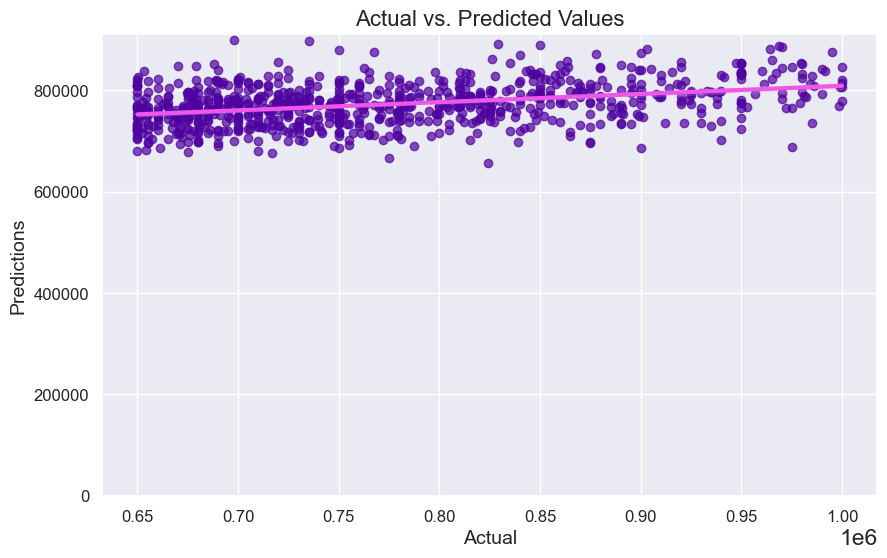

In [161]:
scatter_color = "#4f02a0"
line_color = "#ef57eb"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()